In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
with open("finaldf1.pickle",'rb') as file:
    finaldf1 = pickle.load(file)

In [3]:
finaldf1

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front
0,REDMI,18365,5 mm,10 mm,10 mm,172.5 g,5000,NaN,AMOLED display,Note 13 5G,Mediatek,NaN,6,128,16.94,Full HD+ Display,108MP Rear Camera,nan
1,REDMI,22509,NaN,NaN,NaN,NaN,5000,NaN,NaN,Note 13 5G,Mediatek,NaN,12,256,16.94,Display,108MP Rear Camera,nan
2,REDMI,20470,NaN,NaN,NaN,172.5 g,5000,NaN,AMOLED display,Note 13 5G,Mediatek,NaN,8,256,16.94,Full HD+ Display,108MP Rear Camera,nan
3,REDMI,20445,NaN,NaN,NaN,173.5 g,5000,NaN,NaN,Note 13 5G,Mediatek,NaN,8,256,16.94,Display,108MP Rear Camera,nan
4,REDMI,22539,NaN,NaN,NaN,NaN,5000,NaN,NaN,Note 13 5G,Mediatek,NaN,12,256,16.94,Display,108MP Rear Camera,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,SAMSUNG,30890,8.1 mm,74.8 mm,159.6 mm,189 g,5000,407 PPI,Full HD+ Super AMOLED Display,Galaxy A53,Exynos,Exynos Octa Core Processor,8,128,16.51,Full HD+ Display,64MP + 12MP + 5MP + 5MP,32MP Front Camera
980,SAMSUNG,11999,8.8 mm,76.4 mm,165.1 mm,195 g,5000,401 PPI,Full HD+ Display,Galaxy A13,Exynos,Exynos Octa Core,4,128,16.76,Full HD+ Display,50MP + 5MP + 2MP + 2MP,8MP Front Camera
981,SAMSUNG,14499,8.4 mm,76.9 mm,165.4 mm,195 g,5000,401 PPI,NaN,Galaxy A23,Exynos,Octa-core(EXYNOS),6,128,16.76,Full HD+ Display,50MP Rear Camera,8MP Front Camera
982,SAMSUNG,23999,8.4 mm,76.9 mm,165.4 mm,195 g,5000,401 PPI,NaN,Galaxy A23,Exynos,Octa-core(EXYNOS),8,128,16.76,Full HD+ Display,50MP Rear Camera,8MP Front Camera


In [4]:
finaldf2 = finaldf1.copy()

In [5]:
finaldf2['Depth'] = finaldf2['Depth'].str.split(" ").str[0]

In [6]:
finaldf2['Width'] = finaldf2['Width'].str.split(" ").str[0]

In [7]:
finaldf2['Height'] = finaldf2['Height'].str.split(' ').str[0]

In [8]:
finaldf2['Weight'] = finaldf2['Weight'].str.split(' ').str[0]

In [9]:
finaldf2['Depth'] = finaldf2['Depth'].astype(float)

In [10]:
finaldf2['Width'] = finaldf2['Width'].astype(float)

In [11]:
finaldf2['Height'] = finaldf2['Height'].astype(float)

In [12]:
finaldf2['Weight'] = finaldf2['Weight'].astype(float)

In [13]:
finaldf2['Battery'] = finaldf2['Battery'].astype(float)

In [14]:
finaldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      984 non-null    object 
 1   price        984 non-null    int64  
 2   Depth        662 non-null    float64
 3   Width        657 non-null    float64
 4   Height       661 non-null    float64
 5   Weight       665 non-null    float64
 6   Battery      915 non-null    float64
 7   GPPI         446 non-null    object 
 8   DispType     676 non-null    object 
 9   Model        979 non-null    object 
 10  ProcessorB   979 non-null    object 
 11  ProcessorT   692 non-null    object 
 12  RAM          984 non-null    object 
 13  ROM          984 non-null    object 
 14  displaysize  984 non-null    object 
 15  displaytype  984 non-null    object 
 16  rear         984 non-null    object 
 17  front        984 non-null    object 
dtypes: float64(5), int64(1), object(12)
memory usage: 

In [15]:
def uni_cat(data,x):
    nuni = data[x].nunique()
    uniq = data[x].unique()
    nv = data[x].isnull().sum()
    vc = pd.DataFrame(data[x].value_counts(dropna=False))
    vcper = pd.DataFrame(data[x].value_counts(dropna=False,normalize=True))
    ff = pd.concat([vc,vcper],axis=1)
    
    print(f'Number of unique categories:{nuni}')
    print('-'*50)
    print(f'Unique Categories:{uniq}')
    print('-'*50)
    print(f'Number of null values:{nv}')
    
    plt.figure(figsize=(24,12))
    sns.countplot(x=data[x])
    plt.show()
    
    return ff

Number of unique categories:290
--------------------------------------------------
Unique Categories:['Note 13 5G' '13C' 'Reno11 5G' 'Reno11 Pro 5G' 'A05' 'Camon 20s Pro 5G'
 'X6 Pro 5G' 'X6 5G' 'Edge 40 Neo' 'X100' 'X100 Pro' 'Galaxy A15 5G'
 'Galaxy A25 5G' 'Y28 5G' 'C67 5g' 'Note 13 Pro+ 5G' 'Note 13 Pro 5G'
 'M6 5G' 'A59 5G' '13c 5G' 'Galaxy S23 FE' 'Razar 40' 'POVA 5 Pro 5G'
 'C67 5G' 'Y27' 'M6 Pro 5G' 'AGNI 2 5G'
 'Blaze 2 5G with Dual Sim|50MP Rear Camera|5000 mAh Battery|Expandable Upto 1 TB'
 'Galaxy A05s' 'Pova 5 Pro 5G' 'T1X' 'Pixel 8 Pro' 'T1x' 'Narzo N53'
 'G42 5G' 'G34 5G' 'Y200 5G' 'Nord CE 3 Lite 5G' 'A79 5G' 'Y17s' '90 5G'
 'Pova 5 45W Ultra Fast Charging 6000mAh Big Battery 3D Textured Design 6.78 FHD'
 'Galaxy A33 5G' nan 'Find N3 Flip'
 'P55 5G |50MP Dual Rear Camera|5000mAh Battery|Expandable Upto 1 TB'
 'A18' 'V29 Pro 5G' 'V29 5G' 'Blaze Pro 5G' 'Narzo 60x 5G' 'a14 5g'
 'Narzo 60X 5G'
 'Blaze Pro 5G with Dual Sim|50MP Rear Camera|5000 mAh Battery|Expandable Upto 1

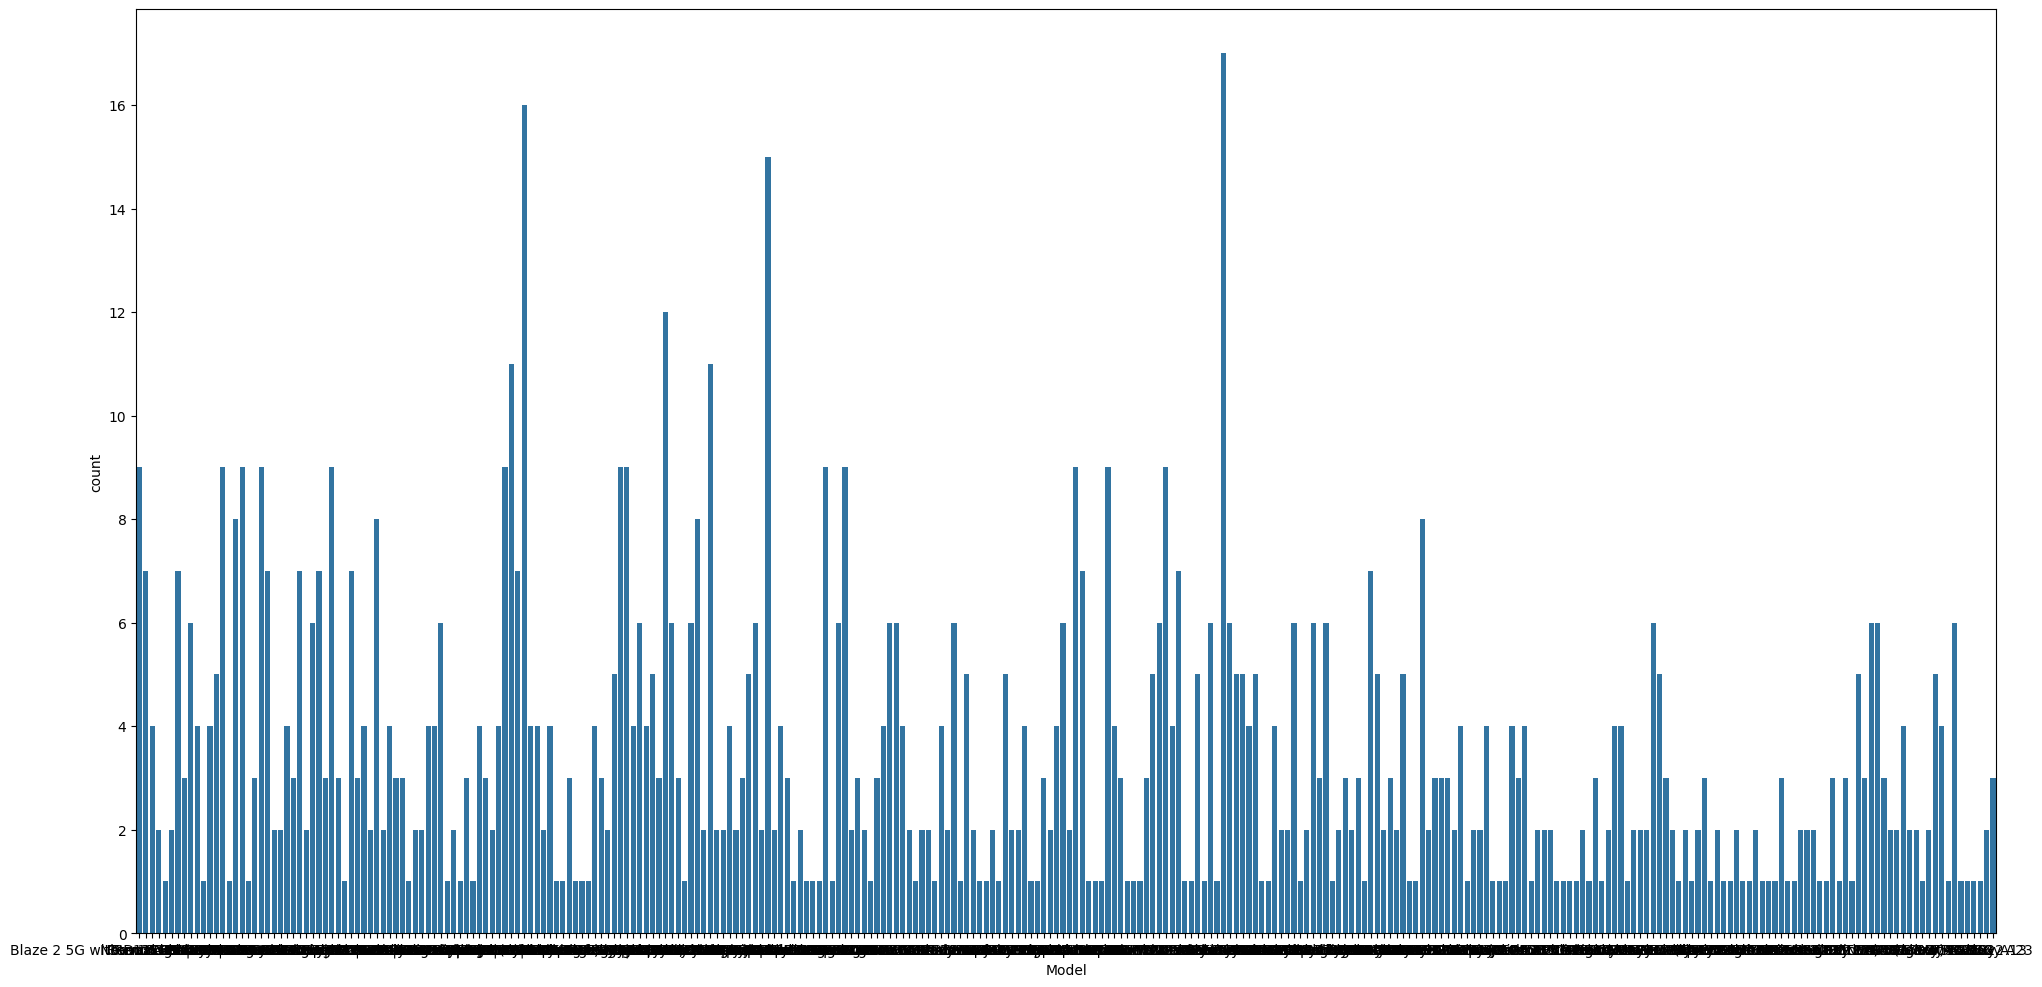

,count,proportion
Model,,
iPhone 14,17,0.017276
iPhone 15 Pro,16,0.016260
Note 12 5G,15,0.015244
Galaxy M33 5G,12,0.012195
iPhone 15,11,0.011179
...,...,...
F21SPRO,1,0.001016
A77 4GB,1,0.001016
11 Lite NE,1,0.001016


In [16]:
uni_cat(data=finaldf2,x='Model')

Number of unique categories:135
--------------------------------------------------
Unique Categories:[nan 'Helio G85' 'Mediatek Dimensity 7050' 'Mediatek Dimensity 8200'
 'MediaTek Helio G85' 'Mediatek Dimensity 8020' 'Dimensity D8300 Ultra'
 '7s Gen 2 Mobile Platform 5G' 'Dimensity 7030' 'Dimensity 9300'
 'Dimensity 6100+' 'Exynos 1280' 'Dimensity 6020' 'Dimensity 6100+ (6 nm)'
 'Dimensity 7200 Ultra 5G' 'Mediatek Dimensity 6100+'
 'Samsung Exynos 2200' 'MediaTek Dimensity 6080 MT6833'
 'Snapdragon 4 Gen 2'
 "India's First 2.6GHz MediaTek Dimensity 7050 6nm Superfast Processor"
 "India's First 2.6GHz MediaTek Dimensity 7050 Superfast Processor"
 'Qualcomm SM6225 Snapdragon 680 4G (6 nm)' 'Qualcomm Snapdragon 680'
 'Tensor G3' 'Android 13, Realme UI T' '680' 'Snapdragon 695 5G' '4 Gen 1'
 'Mediatek Dimensity 6020' 'Mediatek Helio G99' 'Mediatek Dimensity 9200'
 'MediaTek Dimensity 6080 Processor' 'MediaTek Dimensity 6080'
 'Dimensity 8200' '778G' '(Exynos 1330)'
 'mediatek dimensity 61

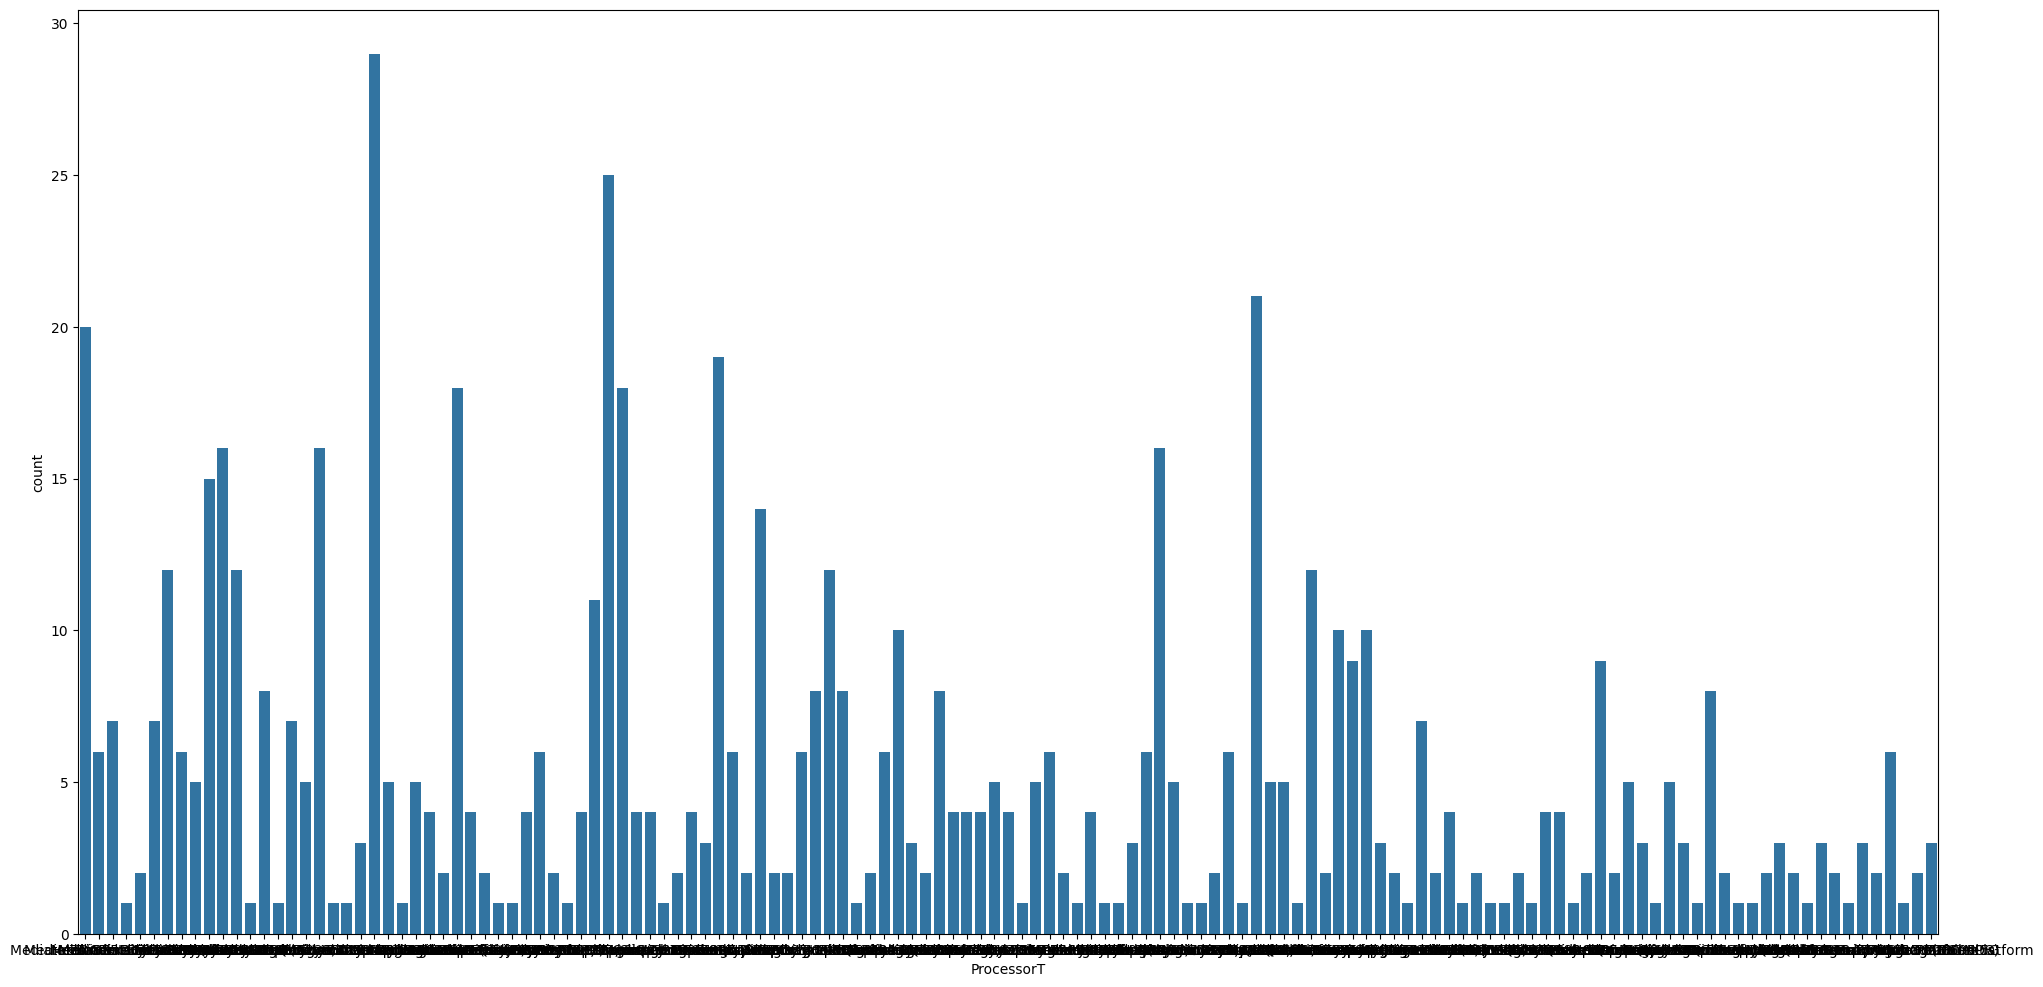

,count,proportion
ProcessorT,,
NaN,292,0.296748
Qualcomm Snapdragon 680,29,0.029472
"A17 Pro Chip, 6 Core Processor",25,0.025407
"A15 Bionic Chip, 6 Core Processor",21,0.021341
Helio G85,20,0.020325
...,...,...
Mediatek Dimensity 1080 5G,1,0.001016
Samsung Exynos 1330,1,0.001016
India's First 2.6GHz MediaTek Dimensity 7050 Superfast Processor,1,0.001016


In [17]:
uni_cat(data=finaldf2,x='ProcessorT')

In [18]:
finaldf2['RAM'] = finaldf2['RAM'].astype(float)
finaldf2['ROM'] = finaldf2['ROM'].astype(float)
finaldf2['displaysize'] = finaldf2['displaysize'].astype(float)

In [19]:
finaldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      984 non-null    object 
 1   price        984 non-null    int64  
 2   Depth        662 non-null    float64
 3   Width        657 non-null    float64
 4   Height       661 non-null    float64
 5   Weight       665 non-null    float64
 6   Battery      915 non-null    float64
 7   GPPI         446 non-null    object 
 8   DispType     676 non-null    object 
 9   Model        979 non-null    object 
 10  ProcessorB   979 non-null    object 
 11  ProcessorT   692 non-null    object 
 12  RAM          915 non-null    float64
 13  ROM          915 non-null    float64
 14  displaysize  975 non-null    float64
 15  displaytype  984 non-null    object 
 16  rear         984 non-null    object 
 17  front        984 non-null    object 
dtypes: float64(8), int64(1), object(9)
memory usage: 1

In [20]:
finaldf2['cam'] = finaldf2['rear'].str.extractall(r'(\d*\.?\d+)').astype(float).unstack().sum(axis=1)

In [21]:
finaldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      984 non-null    object 
 1   price        984 non-null    int64  
 2   Depth        662 non-null    float64
 3   Width        657 non-null    float64
 4   Height       661 non-null    float64
 5   Weight       665 non-null    float64
 6   Battery      915 non-null    float64
 7   GPPI         446 non-null    object 
 8   DispType     676 non-null    object 
 9   Model        979 non-null    object 
 10  ProcessorB   979 non-null    object 
 11  ProcessorT   692 non-null    object 
 12  RAM          915 non-null    float64
 13  ROM          915 non-null    float64
 14  displaysize  975 non-null    float64
 15  displaytype  984 non-null    object 
 16  rear         984 non-null    object 
 17  front        984 non-null    object 
 18  cam          979 non-null    float64
dtypes: float

In [22]:
finaldf2[finaldf2['Company']=='Apple']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
191,Apple,156900,8.25,76.7,159.9,221.0,NaN,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",NaN,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
192,Apple,68499,7.80,71.6,147.6,171.0,NaN,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",NaN,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
193,Apple,76999,7.80,77.8,160.9,201.0,NaN,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",NaN,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
194,Apple,97499,7.80,71.6,147.6,171.0,NaN,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",NaN,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
195,Apple,180990,8.25,70.6,146.6,187.0,NaN,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",NaN,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,Apple,65999,7.80,78.1,160.8,203.0,NaN,458 PPI,Super Retina XDR Display,iPhone 14 Plus,Apple,"A15 Bionic Chip, 6 Core Processor",NaN,NaN,17.02,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
814,Apple,88999,7.80,71.5,146.7,172.0,NaN,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",NaN,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
815,Apple,58999,7.80,71.5,146.7,172.0,NaN,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",NaN,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
816,Apple,88999,7.80,71.5,146.7,172.0,NaN,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",NaN,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0


In [23]:
finaldf2[finaldf2['Company']=='Apple']['Model'].value_counts()

Model
iPhone 14            17
iPhone 15 Pro        16
iPhone 15            11
iPhone 15 Pro Max     9
iPhone 15 Plus        7
iPhone 14 Plus        4
Name: count, dtype: int64

In [24]:
finaldf2['Battery'] = np.where(finaldf2['Model']=='iPhone 14',3279,finaldf2['Battery'])

In [25]:
finaldf2['Battery'] = np.where(finaldf2['Model']=='iPhone 14 Plus',4325,finaldf2['Battery'])

In [26]:
finaldf2['Battery'] = np.where(finaldf2['Model']=='iPhone 15 Pro',3274,finaldf2['Battery'])

In [27]:
finaldf2['Battery'] = np.where(finaldf2['Model']=='iPhone 15',3349,finaldf2['Battery'])

In [28]:
finaldf2['Battery'] = np.where(finaldf2['Model']=='iPhone 15 Pro Max',4422,finaldf2['Battery'])

In [29]:
finaldf2['Battery'] = np.where(finaldf2['Model']=='iPhone 15 Plus',4383,finaldf2['Battery'])

In [30]:
finaldf2['RAM'] = np.where(finaldf2['Model']=='iPhone 14',6,finaldf2['RAM'])
finaldf2['RAM'] = np.where(finaldf2['Model']=='iPhone 14 Plus',6,finaldf2['RAM'])
finaldf2['RAM'] = np.where(finaldf2['Model']=='iPhone 15 Pro',8,finaldf2['RAM'])
finaldf2['RAM'] = np.where(finaldf2['Model']=='iPhone 15',6,finaldf2['RAM'])
finaldf2['RAM'] = np.where(finaldf2['Model']=='iPhone 15 Pro Max',8,finaldf2['RAM'])
finaldf2['RAM'] = np.where(finaldf2['Model']=='iPhone 15 Plus',6,finaldf2['RAM'])

In [31]:
finaldf2[finaldf2['Model']=='iPhone 14']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
569,Apple,59999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
570,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
800,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
801,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
802,Apple,58999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
803,Apple,88999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
804,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
805,Apple,88999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
806,Apple,58999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
807,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0


In [32]:
finaldf2[(finaldf2['price']==59999) & (finaldf2['Company']=='Apple')] ##one data point is deviating

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
569,Apple,59999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0


In [33]:
finaldf2.drop(569,axis=0,inplace=True)

In [34]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 14')&(finaldf2['price']==58999),128,finaldf2['ROM'])

In [35]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 14')&(finaldf2['price']==68999),256,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 14')&(finaldf2['price']==88999),512,finaldf2['ROM'])

In [36]:
finaldf2[finaldf2['Model']=='iPhone 14']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
570,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,256.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
800,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,256.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
801,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,256.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
802,Apple,58999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
803,Apple,88999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
804,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,256.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
805,Apple,88999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
806,Apple,58999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
807,Apple,68999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,256.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
808,Apple,58999,7.8,71.5,146.7,172.0,3279.0,460 PPI,Super Retina XDR Display,iPhone 14,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0


In [37]:
finaldf2[finaldf2['Model']=='iPhone 15 Pro']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
195,Apple,180990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
197,Apple,130990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
199,Apple,130990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
200,Apple,180990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
202,Apple,161990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
203,Apple,140990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
205,Apple,140990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
206,Apple,161990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
208,Apple,161990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
214,Apple,140990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0


In [38]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro')&(finaldf2['price']==130990),128,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro')&(finaldf2['price']==140990),256,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro')&(finaldf2['price']==161990),512,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro')&(finaldf2['price']==180990),1024,finaldf2['ROM'])

In [39]:
finaldf2[finaldf2['Model']=='iPhone 15 Pro']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
195,Apple,180990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,1024.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
197,Apple,130990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,128.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
199,Apple,130990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,128.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
200,Apple,180990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,1024.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
202,Apple,161990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
203,Apple,140990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,256.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
205,Apple,140990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,256.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
206,Apple,161990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
208,Apple,161990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
214,Apple,140990,8.25,70.6,146.6,187.0,3274.0,460 PPI,All Screen OLED Display,iPhone 15 Pro,Apple,"A17 Pro Chip, 6 Core Processor",8.0,256.0,15.49,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0


In [40]:
finaldf2[finaldf2['Model']=='iPhone 15']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
192,Apple,68499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
194,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
201,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
204,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
212,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
213,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
218,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
224,Apple,77499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
225,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
231,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0


In [41]:
finaldf2.drop(192,axis=0,inplace=True)

In [42]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15')&(finaldf2['price']==67499),128,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15')&(finaldf2['price']==77499),256,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15')&(finaldf2['price']==97499),512,finaldf2['ROM'])

In [43]:
finaldf2[finaldf2['Model']=='iPhone 15']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
194,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
201,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
204,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
212,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
213,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
218,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
224,Apple,77499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,256.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
225,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
231,Apple,97499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
232,Apple,67499,7.8,71.6,147.6,171.0,3349.0,460 PPI,All Screen OLED Display,iPhone 15,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,15.49,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0


In [44]:
finaldf2[finaldf2['Model']=='iPhone 15 Pro Max']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
191,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
196,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
209,Apple,176900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
210,Apple,176900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
211,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
221,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
229,Apple,196900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
230,Apple,176900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
239,Apple,196900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0


In [45]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro Max')&(finaldf2['price']==156900),128,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro Max')&(finaldf2['price']==176900),256,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Pro Max')&(finaldf2['price']==196900),512,finaldf2['ROM'])

In [46]:
finaldf2[finaldf2['Model']=='iPhone 15 Pro Max']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
191,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
196,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
209,Apple,176900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,256.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
210,Apple,176900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,256.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
211,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
221,Apple,156900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
229,Apple,196900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,512.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
230,Apple,176900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,256.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0
239,Apple,196900,8.25,76.7,159.9,221.0,4422.0,460 PPI,All Screen OLED Display,iPhone 15 Pro Max,Apple,"A17 Pro Chip, 6 Core Processor",8.0,512.0,17.02,Super Retina XDR Display,48MP + 12MP + 12MP,12MP Front Camera,72.0


In [47]:
finaldf2[finaldf2['Model']=='iPhone 15 Plus']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
193,Apple,76999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
198,Apple,86999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
207,Apple,106999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
215,Apple,106999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
216,Apple,76999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
217,Apple,77999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
222,Apple,76999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0


In [48]:
finaldf2.drop(217,axis=0,inplace=True)

In [49]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Plus')&(finaldf2['price']==76999),128,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Plus')&(finaldf2['price']==86999),256,finaldf2['ROM'])
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 15 Plus')&(finaldf2['price']==106999),512,finaldf2['ROM'])

In [50]:
finaldf2[finaldf2['Model']=='iPhone 15 Plus']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
193,Apple,76999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
198,Apple,86999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,256.0,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
207,Apple,106999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
215,Apple,106999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,512.0,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
216,Apple,76999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0
222,Apple,76999,7.8,77.8,160.9,201.0,4383.0,460 PPI,All Screen OLED Display,iPhone 15 Plus,Apple,"A16 Bionic Chip, 6 Core Processor",6.0,128.0,17.02,Super Retina XDR Display,48MP + 12MP,12MP Front Camera,60.0


In [51]:
finaldf2[finaldf2['Model']=='iPhone 14 Plus']

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
799,Apple,66999,7.8,78.1,160.8,203.0,4325.0,458 PPI,Super Retina XDR Display,iPhone 14 Plus,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
810,Apple,65999,7.8,78.1,160.8,203.0,4325.0,458 PPI,Super Retina XDR Display,iPhone 14 Plus,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
813,Apple,65999,7.8,78.1,160.8,203.0,4325.0,458 PPI,Super Retina XDR Display,iPhone 14 Plus,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0
817,Apple,65999,7.8,78.1,160.8,203.0,4325.0,458 PPI,Super Retina XDR Display,iPhone 14 Plus,Apple,"A15 Bionic Chip, 6 Core Processor",6.0,NaN,17.02,Super Retina XDR Display,12MP + 12MP,12MP Front Camera,24.0


In [52]:
finaldf2.drop(799,axis=0,inplace=True)

In [53]:
finaldf2['ROM'] = np.where((finaldf2['Model']=='iPhone 14 Plus')&(finaldf2['price']==65999),128,finaldf2['ROM'])

In [54]:
finaldf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 983
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      980 non-null    object 
 1   price        980 non-null    int64  
 2   Depth        658 non-null    float64
 3   Width        653 non-null    float64
 4   Height       657 non-null    float64
 5   Weight       661 non-null    float64
 6   Battery      975 non-null    float64
 7   GPPI         442 non-null    object 
 8   DispType     672 non-null    object 
 9   Model        975 non-null    object 
 10  ProcessorB   975 non-null    object 
 11  ProcessorT   688 non-null    object 
 12  RAM          975 non-null    float64
 13  ROM          975 non-null    float64
 14  displaysize  971 non-null    float64
 15  displaytype  980 non-null    object 
 16  rear         980 non-null    object 
 17  front        980 non-null    object 
 18  cam          975 non-null    float64
dtypes: float64(9)

In [55]:
finaldf2.duplicated().sum()

274

In [56]:
finaldf2.drop_duplicates(inplace=True)

In [57]:
finaldf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 983
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      706 non-null    object 
 1   price        706 non-null    int64  
 2   Depth        401 non-null    float64
 3   Width        397 non-null    float64
 4   Height       401 non-null    float64
 5   Weight       405 non-null    float64
 6   Battery      701 non-null    float64
 7   GPPI         275 non-null    object 
 8   DispType     416 non-null    object 
 9   Model        701 non-null    object 
 10  ProcessorB   701 non-null    object 
 11  ProcessorT   428 non-null    object 
 12  RAM          701 non-null    float64
 13  ROM          701 non-null    float64
 14  displaysize  697 non-null    float64
 15  displaytype  706 non-null    object 
 16  rear         706 non-null    object 
 17  front        706 non-null    object 
 18  cam          701 non-null    float64
dtypes: float64(9)

In [58]:
finaldf3 = finaldf2.copy()
finaldf4 = finaldf2.copy()
finaldf5 = finaldf2.copy()
finaldf6 = finaldf2.copy()
finaldf7 = finaldf2.copy()

In [59]:
# with open("finaldf2.pickle","wb") as file:
#     pickle.dump(finaldf2,file)

In [60]:
with open("finaldf2.pickle","rb") as file:
    finaldf2 = pickle.load(file)

In [61]:
finaldf3

,Company,price,Depth,Width,Height,Weight,Battery,GPPI,DispType,Model,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,rear,front,cam
0,REDMI,18365,5.0,10.0,10.0,172.5,5000.0,NaN,AMOLED display,Note 13 5G,Mediatek,NaN,6.0,128.0,16.94,Full HD+ Display,108MP Rear Camera,nan,108.0
1,REDMI,22509,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,Note 13 5G,Mediatek,NaN,12.0,256.0,16.94,Display,108MP Rear Camera,nan,108.0
2,REDMI,20470,NaN,NaN,NaN,172.5,5000.0,NaN,AMOLED display,Note 13 5G,Mediatek,NaN,8.0,256.0,16.94,Full HD+ Display,108MP Rear Camera,nan,108.0
3,REDMI,20445,NaN,NaN,NaN,173.5,5000.0,NaN,NaN,Note 13 5G,Mediatek,NaN,8.0,256.0,16.94,Display,108MP Rear Camera,nan,108.0
4,REDMI,22539,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,Note 13 5G,Mediatek,NaN,12.0,256.0,16.94,Display,108MP Rear Camera,nan,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,SAMSUNG,30890,8.1,74.8,159.6,189.0,5000.0,407 PPI,Full HD+ Super AMOLED Display,Galaxy A53,Exynos,Exynos Octa Core Processor,8.0,128.0,16.51,Full HD+ Display,64MP + 12MP + 5MP + 5MP,32MP Front Camera,86.0
980,SAMSUNG,11999,8.8,76.4,165.1,195.0,5000.0,401 PPI,Full HD+ Display,Galaxy A13,Exynos,Exynos Octa Core,4.0,128.0,16.76,Full HD+ Display,50MP + 5MP + 2MP + 2MP,8MP Front Camera,59.0
981,SAMSUNG,14499,8.4,76.9,165.4,195.0,5000.0,401 PPI,NaN,Galaxy A23,Exynos,Octa-core(EXYNOS),6.0,128.0,16.76,Full HD+ Display,50MP Rear Camera,8MP Front Camera,50.0
982,SAMSUNG,23999,8.4,76.9,165.4,195.0,5000.0,401 PPI,NaN,Galaxy A23,Exynos,Octa-core(EXYNOS),8.0,128.0,16.76,Full HD+ Display,50MP Rear Camera,8MP Front Camera,50.0


In [62]:
a = 'a b c'
a = list(a)
for i in a:
    if i == 'a':
        a.remove(i)
"".join(a)

' b c'

In [63]:
a = 'ab bc ca'
a = a.split()
b = ""
for i in a:
    if i in ['ab','bc']:
        a.remove(i)
b = " ".join(a)
b

'bc ca'

In [64]:
def processor(x):
    x = x.split()
    y = ""
    for i in x:
        if i in ['Mediatek','Qualcomm','Google','Apple','Samsung',
                 'MT6769H','mediatek','Processor','Mobile','Platform',
                 ',','Octa','Core','MediaTek','MT6833',"India's",'First',
                 '2.6GHz','6nm','Superfast','Realme','Android','1','2','6',
                 '5G','plus','processor',]:
            x.remove(i)
    
    y = " ".join(x)
    return y

In [65]:
finaldf3["ProcessorT"] = finaldf3["ProcessorT"].astype(str)

In [66]:
finaldf3['ProcessorT'] = finaldf3['ProcessorT'].apply(processor)

Number of unique categories:101
--------------------------------------------------
Unique Categories:['nan' 'Helio G85' 'Dimensity 7050' 'Dimensity 8200' 'Dimensity 8020'
 'Dimensity D8300 Ultra' '7s Gen Mobile 5G' 'Dimensity 7030'
 'Dimensity 9300' 'Dimensity 6100+' 'Exynos 1280' 'Dimensity 6020'
 'Dimensity 6100+ (6 nm)' 'Dimensity 7200 Ultra' 'Exynos 2200'
 'Dimensity 6080' 'Snapdragon 4 Gen'
 'First MediaTek Dimensity 7050 Superfast'
 'First MediaTek Dimensity 7050 Processor'
 'SM6225 Snapdragon 680 4G (6 nm)' 'Snapdragon 680' 'Tensor G3' '13, UI T'
 '680' 'Snapdragon 695' '4 Gen' 'Helio G99' 'Dimensity 9200' '778G'
 '(Exynos 1330)' 'dimensity 6100 processor' 'T612' 'Snapdragon 8+ Gen'
 'A17 Pro Chip, Core' 'A16 Bionic Chip, Core' 'Tensor G2' 'Dimensity 7200'
 'Snapdragon 888' 'Dimensity 8050' 'MT6769Z Helio G85' 'Dimensity 1080'
 '6833' 'Dimesity 8050' 'Snapdragon 8 Gen' 'Helio G88' 'Mrdiatek'
 'MT6781 Helio G96' 'Snapdragon 778G' 'Dimensity 7020' 'G37 Core'
 'Exynos 850, Core' 'D

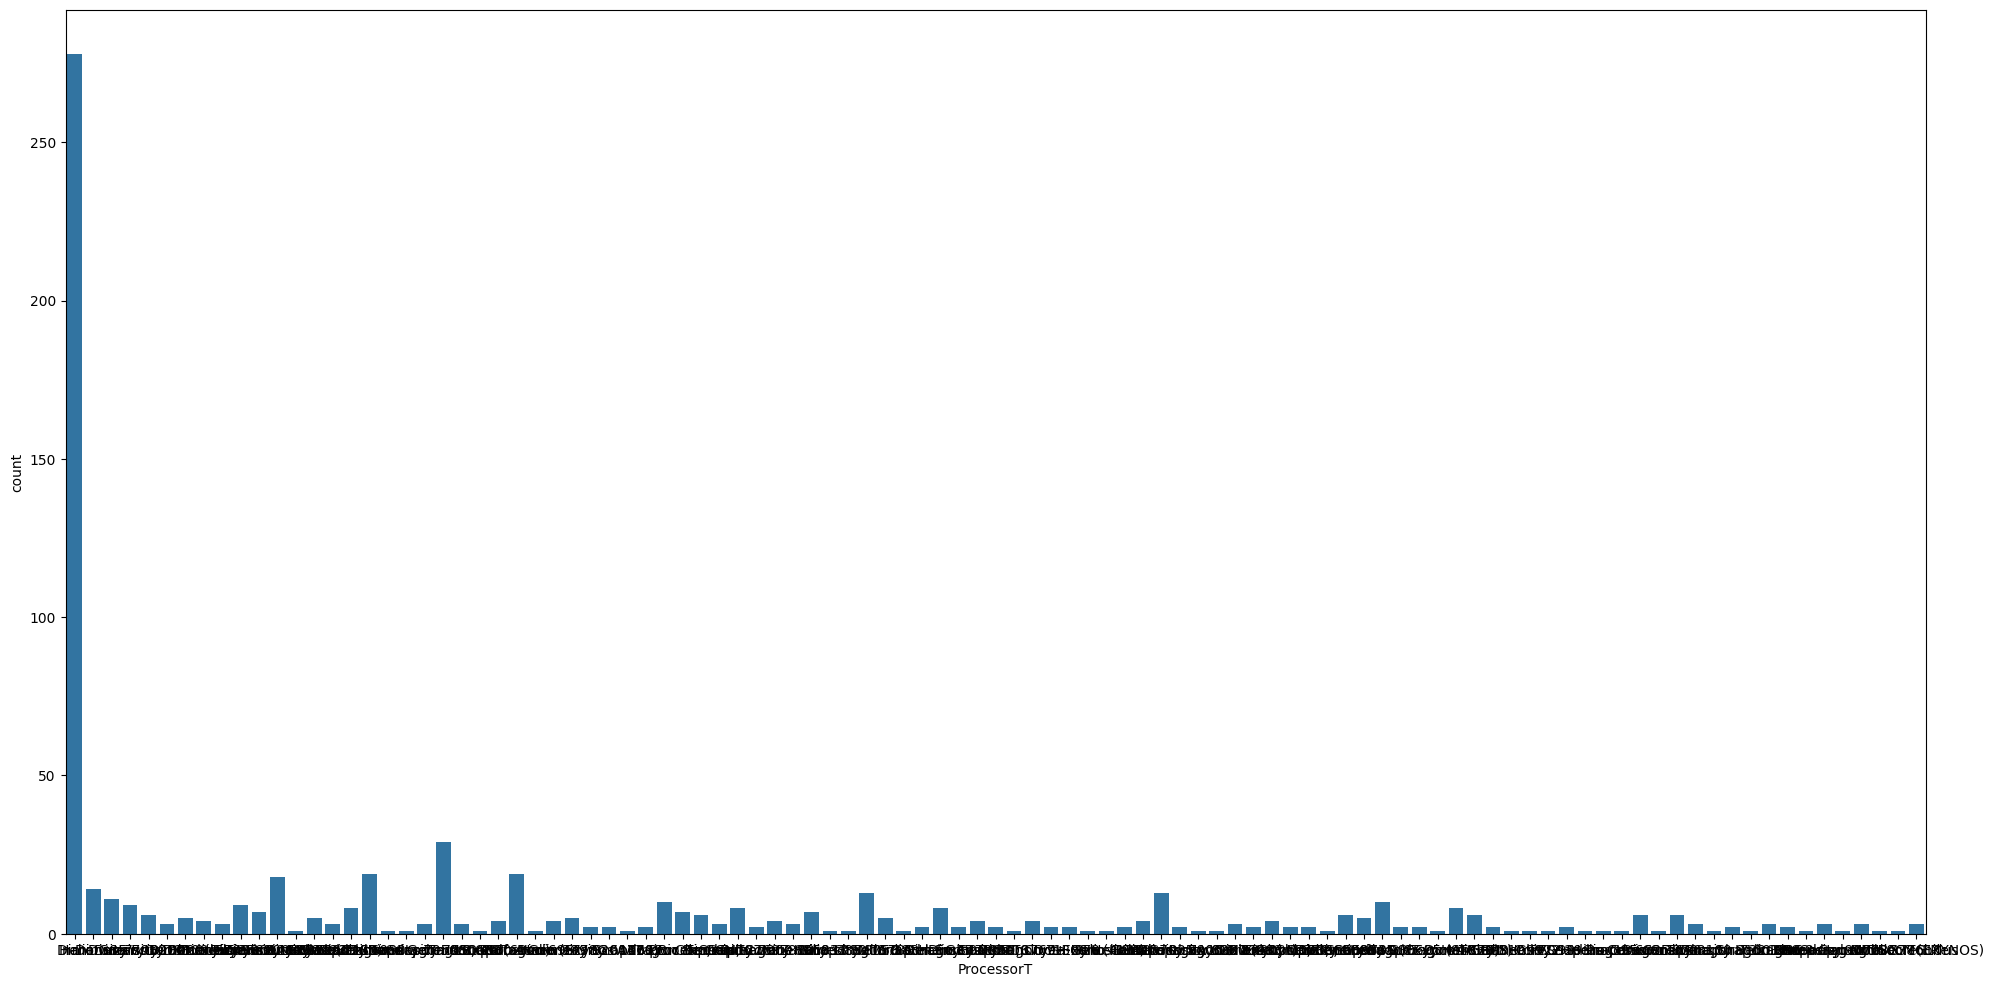

,count,proportion
ProcessorT,,
nan,278,0.393768
Snapdragon 680,29,0.041076
Snapdragon 695,19,0.026912
Snapdragon 4 Gen,19,0.026912
Dimensity 6020,18,0.025496
...,...,...
"13, UI T",1,0.001416
4 Gen,1,0.001416
Dimensity 9000+,1,0.001416


In [67]:
uni_cat(data=finaldf3,x='ProcessorT')   

In [68]:
finaldf3['ProcessorT'] = finaldf3['ProcessorT'].replace({'nan':'Other'})

In [69]:
finaldf3['ProcessorT'] =finaldf3['ProcessorT'].replace({'7s Gen Mobile 5G':'Snapdragon 7s Gen',
                                                        'Dimensity 6100+ (6 nm)':'Dimensity 6100+','SM6225 Snapdragon 680 4G (6 nm)':'Snapdragon 680',
                                                        'First MediaTek Dimensity 7050 Superfast':'MediaTek Dimensity 7050','First MediaTek Dimensity 7050 Processor':'MediaTek Dimensity 7050',
                                                        'SM6225 Snapdragon 680 4G (6 nm)':'Snapdragon 680','13, UI T':'Unisoc T616',
                                                        '680':'Snapdragon 680','4 Gen':'Snapdragon 4 Gen','778G':'Snapdragon 778G','(Exynos 1330)':'Exynos 1330',
                                                        'dimensity 6100 processor':'Dimensity 6100','T612':'Unisoc T612','A17 Pro Chip, Core':'A17 Pro Chip',
                                                        'A16 Bionic Chip, Core':'A16 Bionic Chip','MT6769Z Helio G85':'Helio G85','6833':'Dimensity 6833',
                                                        'Mrdiatek':'Other','MT6781 Helio G96':'Helio G96','G37 Core':'Helio G37','Exynos 850, Core':'Exynos 850',
                                                        'Dimensity 700 Octa-core':'Dimension 700','Snapdragon 7+ Gen (4nm)':'Snapdragon 7+ Gen',
                                                        'MT6769H Helio G88':'Helio G88','P70':'Helio P70','Dimensity 9000 MT6983':'Dimensity 9000',
                                                        'Dimensity 8200 (4 nm)':'Dimensity 8200','Snapdragon® 8 Gen Mobile':'Snapdragon 8 Gen',
                                                        'Exynos 1330, Core':'Exynos 1330','A15 Bionic Chip, Core':'A15 Bionic Chip',
                                                        'Dimensity 1080, Core':'Dimensity 1080','Exynos 1380, Core':'Exynos 1380',
                                                        'SEC S5E8535 (Exynos 1330)':'Exynos 1330','Snapdragon 695 (SM6375)':'Snapdragon 695','Helio G99 Core':'Helio G99',
                                                        'MT8781 Helio G99':'Helio G99','G99':'Helio G99','P22':'Helio P22',
                                                        'Dimensity 920 Processor':'Dimensity 920','P70 Helios':'Helio P70',
                                                        'Helio G95 Core':'Helio G95','Core':'Others',
                                                        'Dimensity 8100 Max':'Dimensity 8100','Snapdragon 888 +':'Snapdragon 888+',
                                                        'G96':'Helio G95','Snapdragon 8 Gen Mobile':'Snapdragon 8 Gen',
                                                        'Snapdragon 778G Mobile':'Snapdragon 778G','Snapdragon 778G Plus':'Snapdragon 778G+','Octa-core(EXYNOS)':'Other'})

Number of unique categories:74
--------------------------------------------------
Unique Categories:['Other' 'Helio G85' 'Dimensity 7050' 'Dimensity 8200' 'Dimensity 8020'
 'Dimensity D8300 Ultra' 'Snapdragon 7s Gen' 'Dimensity 7030'
 'Dimensity 9300' 'Dimensity 6100+' 'Exynos 1280' 'Dimensity 6020'
 'Dimensity 7200 Ultra' 'Exynos 2200' 'Dimensity 6080' 'Snapdragon 4 Gen'
 'MediaTek Dimensity 7050' 'Snapdragon 680' 'Tensor G3' 'Unisoc T616'
 'Snapdragon 695' 'Helio G99' 'Dimensity 9200' 'Snapdragon 778G'
 'Exynos 1330' 'Dimensity 6100' 'Unisoc T612' 'Snapdragon 8+ Gen'
 'A17 Pro Chip' 'A16 Bionic Chip' 'Tensor G2' 'Dimensity 7200'
 'Snapdragon 888' 'Dimensity 8050' 'Dimensity 1080' 'Dimensity 6833'
 'Dimesity 8050' 'Snapdragon 8 Gen' 'Helio G88' 'Helio G96'
 'Dimensity 7020' 'Helio G37' 'Exynos 850' 'Dimension 700'
 'Dimensity 1300' 'Snapdragon 7+ Gen' 'Helio P70' 'Helio A22' 'Helio G70'
 'Helio P35' 'Snapdragon 685' 'Dimensity 9000' 'A15 Bionic Chip'
 'Exynos 1380' 'Dimensity 9000+' '

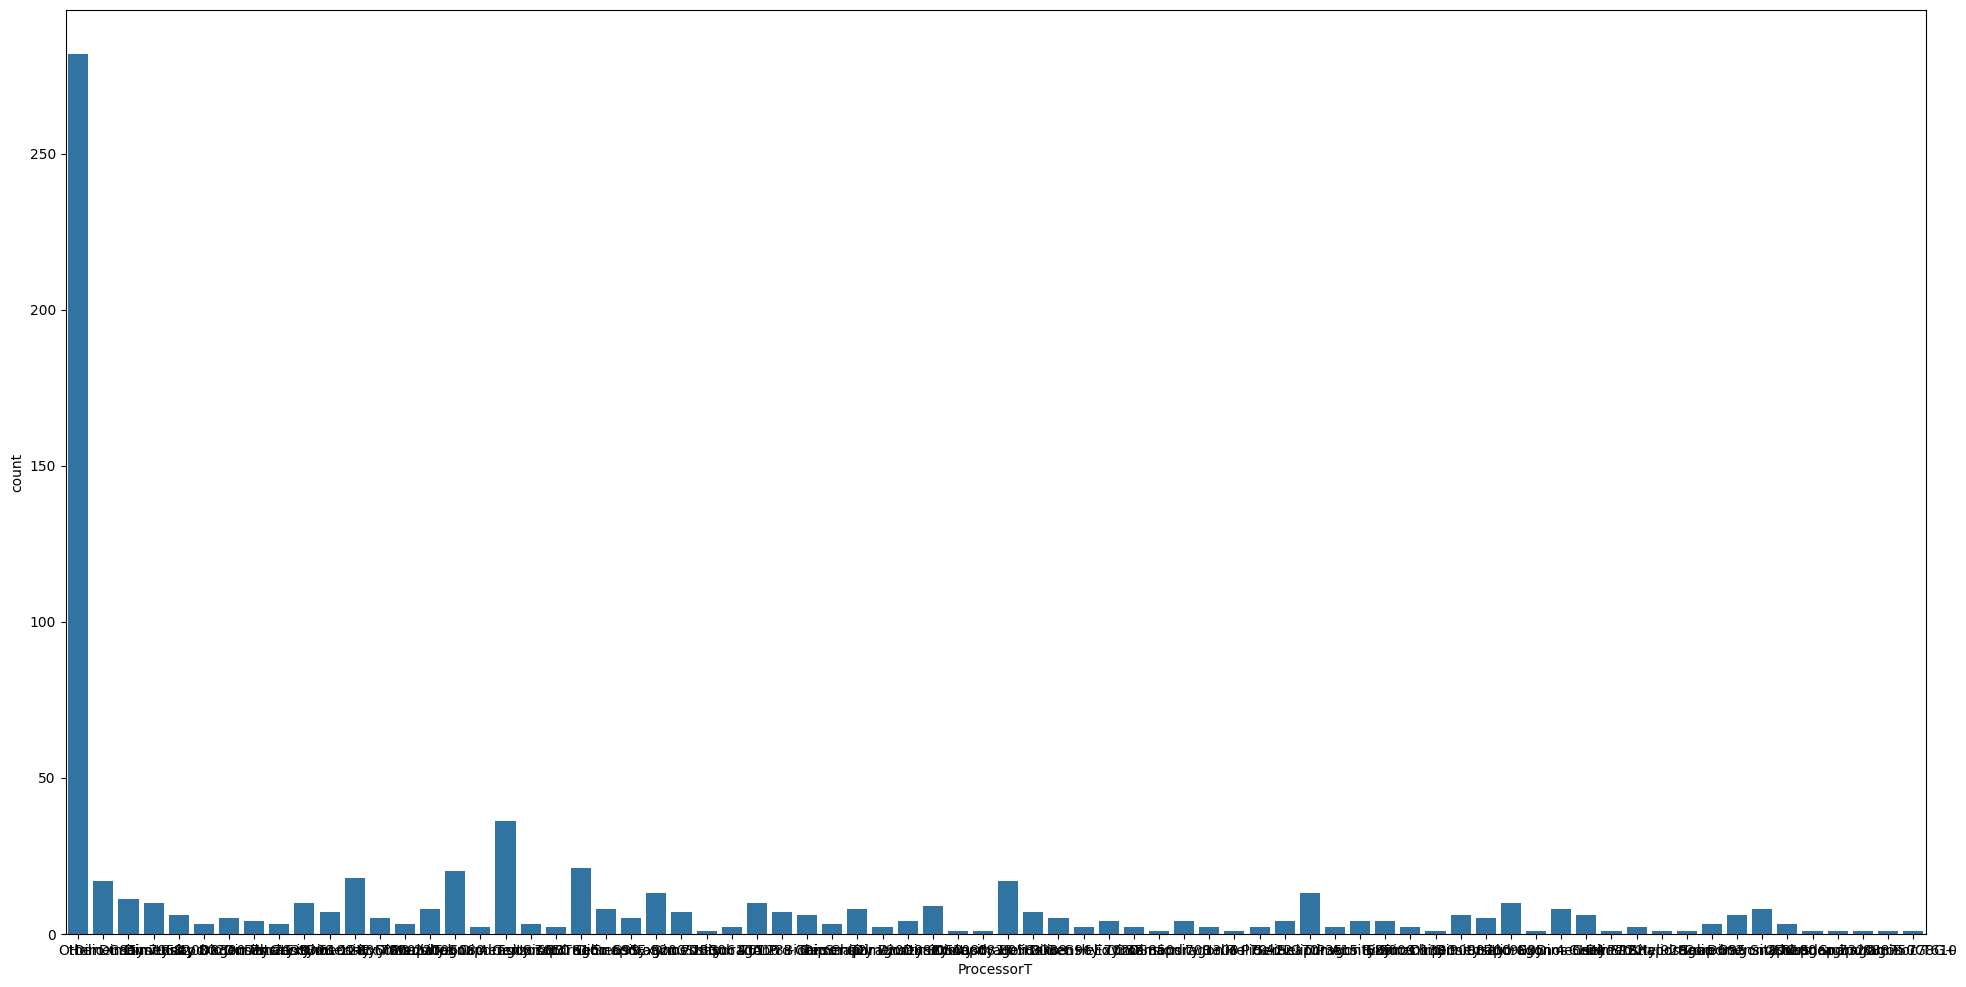

,count,proportion
ProcessorT,,
Other,282,0.399433
Snapdragon 680,36,0.050992
Snapdragon 695,21,0.029745
Snapdragon 4 Gen,20,0.028329
Dimensity 6020,18,0.025496
...,...,...
Snapdragon 732G,1,0.001416
Snapdragon 888+,1,0.001416
Snapdragon 750G,1,0.001416


In [70]:
uni_cat(data=finaldf3,x='ProcessorT')

In [71]:
finaldf3.drop(['GPPI','DispType','Model','rear','front'],axis=1,inplace=True)

In [72]:
finaldf3

,Company,price,Depth,Width,Height,Weight,Battery,ProcessorB,ProcessorT,RAM,ROM,displaysize,displaytype,cam
0,REDMI,18365,5.0,10.0,10.0,172.5,5000.0,Mediatek,Other,6.0,128.0,16.94,Full HD+ Display,108.0
1,REDMI,22509,NaN,NaN,NaN,NaN,5000.0,Mediatek,Other,12.0,256.0,16.94,Display,108.0
2,REDMI,20470,NaN,NaN,NaN,172.5,5000.0,Mediatek,Other,8.0,256.0,16.94,Full HD+ Display,108.0
3,REDMI,20445,NaN,NaN,NaN,173.5,5000.0,Mediatek,Other,8.0,256.0,16.94,Display,108.0
4,REDMI,22539,NaN,NaN,NaN,NaN,5000.0,Mediatek,Other,12.0,256.0,16.94,Display,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,SAMSUNG,30890,8.1,74.8,159.6,189.0,5000.0,Exynos,Exynos Core,8.0,128.0,16.51,Full HD+ Display,86.0
980,SAMSUNG,11999,8.8,76.4,165.1,195.0,5000.0,Exynos,Exynos Core,4.0,128.0,16.76,Full HD+ Display,59.0
981,SAMSUNG,14499,8.4,76.9,165.4,195.0,5000.0,Exynos,Other,6.0,128.0,16.76,Full HD+ Display,50.0
982,SAMSUNG,23999,8.4,76.9,165.4,195.0,5000.0,Exynos,Other,8.0,128.0,16.76,Full HD+ Display,50.0


In [73]:
finaldf3.duplicated().sum()

6

In [74]:
finaldf3.drop_duplicates(inplace=True)

In [75]:
finaldf3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 983
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      700 non-null    object 
 1   price        700 non-null    int64  
 2   Depth        397 non-null    float64
 3   Width        393 non-null    float64
 4   Height       397 non-null    float64
 5   Weight       400 non-null    float64
 6   Battery      695 non-null    float64
 7   ProcessorB   695 non-null    object 
 8   ProcessorT   700 non-null    object 
 9   RAM          695 non-null    float64
 10  ROM          695 non-null    float64
 11  displaysize  691 non-null    float64
 12  displaytype  700 non-null    object 
 13  cam          695 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 82.0+ KB


In [76]:
finaldf3.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.90,0.95,0.96,0.97,0.98,0.99])

,price,Depth,Width,Height,Weight,Battery,RAM,ROM,displaysize,cam
count,700.000000,397.000000,393.000000,397.000000,400.000000,695.000000,695.000000,695.000000,691.000000,695.000000
mean,26551.910000,8.157179,74.895639,158.502469,190.343125,5005.497842,7.782734,162.008633,16.804399,64.363338
std,24562.934114,1.390422,13.571280,25.195724,20.745567,1761.614512,8.309069,93.209348,0.388869,34.419003
min,7649.000000,0.900000,2.700000,5.220000,0.500000,3274.000000,3.000000,6.000000,15.490000,5.000000
1%,9497.000000,5.000000,7.692000,9.920000,166.682000,3344.800000,3.000000,32.000000,15.490000,8.000000
2%,10157.820000,6.300000,10.000000,16.500000,168.294000,3700.000000,4.000000,64.000000,15.698000,12.000000
3%,10287.760000,6.900000,70.600000,79.520000,170.000000,4132.000000,4.000000,64.000000,16.210000,13.000000
4%,10389.960000,7.000000,70.868000,146.552000,171.000000,4300.000000,4.000000,64.000000,16.210000,15.000000
5%,10489.800000,7.360000,71.500000,146.680000,172.000000,4400.000000,4.000000,64.000000,16.260000,15.000000
50%,18890.000000,8.150000,75.550000,163.950000,189.250000,5000.000000,8.000000,128.000000,16.810000,53.000000


In [77]:
finaldf3['Depth'] = finaldf3['Depth'].fillna(finaldf3['Depth'].mean())

In [78]:
finaldf3['Width'] = finaldf3['Width'].fillna(finaldf3['Width'].mean())

In [79]:
finaldf3['Height'] = finaldf3['Height'].fillna(finaldf3['Height'].mean())

In [80]:
finaldf3['Weight'] = finaldf3['Weight'].fillna(finaldf3['Weight'].mean())

In [81]:
finaldf3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 983
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      700 non-null    object 
 1   price        700 non-null    int64  
 2   Depth        700 non-null    float64
 3   Width        700 non-null    float64
 4   Height       700 non-null    float64
 5   Weight       700 non-null    float64
 6   Battery      695 non-null    float64
 7   ProcessorB   695 non-null    object 
 8   ProcessorT   700 non-null    object 
 9   RAM          695 non-null    float64
 10  ROM          695 non-null    float64
 11  displaysize  691 non-null    float64
 12  displaytype  700 non-null    object 
 13  cam          695 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 82.0+ KB


In [82]:
finaldf3.dropna(inplace=True)

In [83]:
finaldf3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 983
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      691 non-null    object 
 1   price        691 non-null    int64  
 2   Depth        691 non-null    float64
 3   Width        691 non-null    float64
 4   Height       691 non-null    float64
 5   Weight       691 non-null    float64
 6   Battery      691 non-null    float64
 7   ProcessorB   691 non-null    object 
 8   ProcessorT   691 non-null    object 
 9   RAM          691 non-null    float64
 10  ROM          691 non-null    float64
 11  displaysize  691 non-null    float64
 12  displaytype  691 non-null    object 
 13  cam          691 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 81.0+ KB


In [84]:
num = finaldf3[finaldf3.dtypes[finaldf3.dtypes!=object].index]

In [85]:
num

,price,Depth,Width,Height,Weight,Battery,RAM,ROM,displaysize,cam
0,18365,5.000000,10.000000,10.000000,172.500000,5000.0,6.0,128.0,16.94,108.0
1,22509,8.157179,74.895639,158.502469,190.343125,5000.0,12.0,256.0,16.94,108.0
2,20470,8.157179,74.895639,158.502469,172.500000,5000.0,8.0,256.0,16.94,108.0
3,20445,8.157179,74.895639,158.502469,173.500000,5000.0,8.0,256.0,16.94,108.0
4,22539,8.157179,74.895639,158.502469,190.343125,5000.0,12.0,256.0,16.94,108.0
...,...,...,...,...,...,...,...,...,...,...
979,30890,8.100000,74.800000,159.600000,189.000000,5000.0,8.0,128.0,16.51,86.0
980,11999,8.800000,76.400000,165.100000,195.000000,5000.0,4.0,128.0,16.76,59.0
981,14499,8.400000,76.900000,165.400000,195.000000,5000.0,6.0,128.0,16.76,50.0
982,23999,8.400000,76.900000,165.400000,195.000000,5000.0,8.0,128.0,16.76,50.0


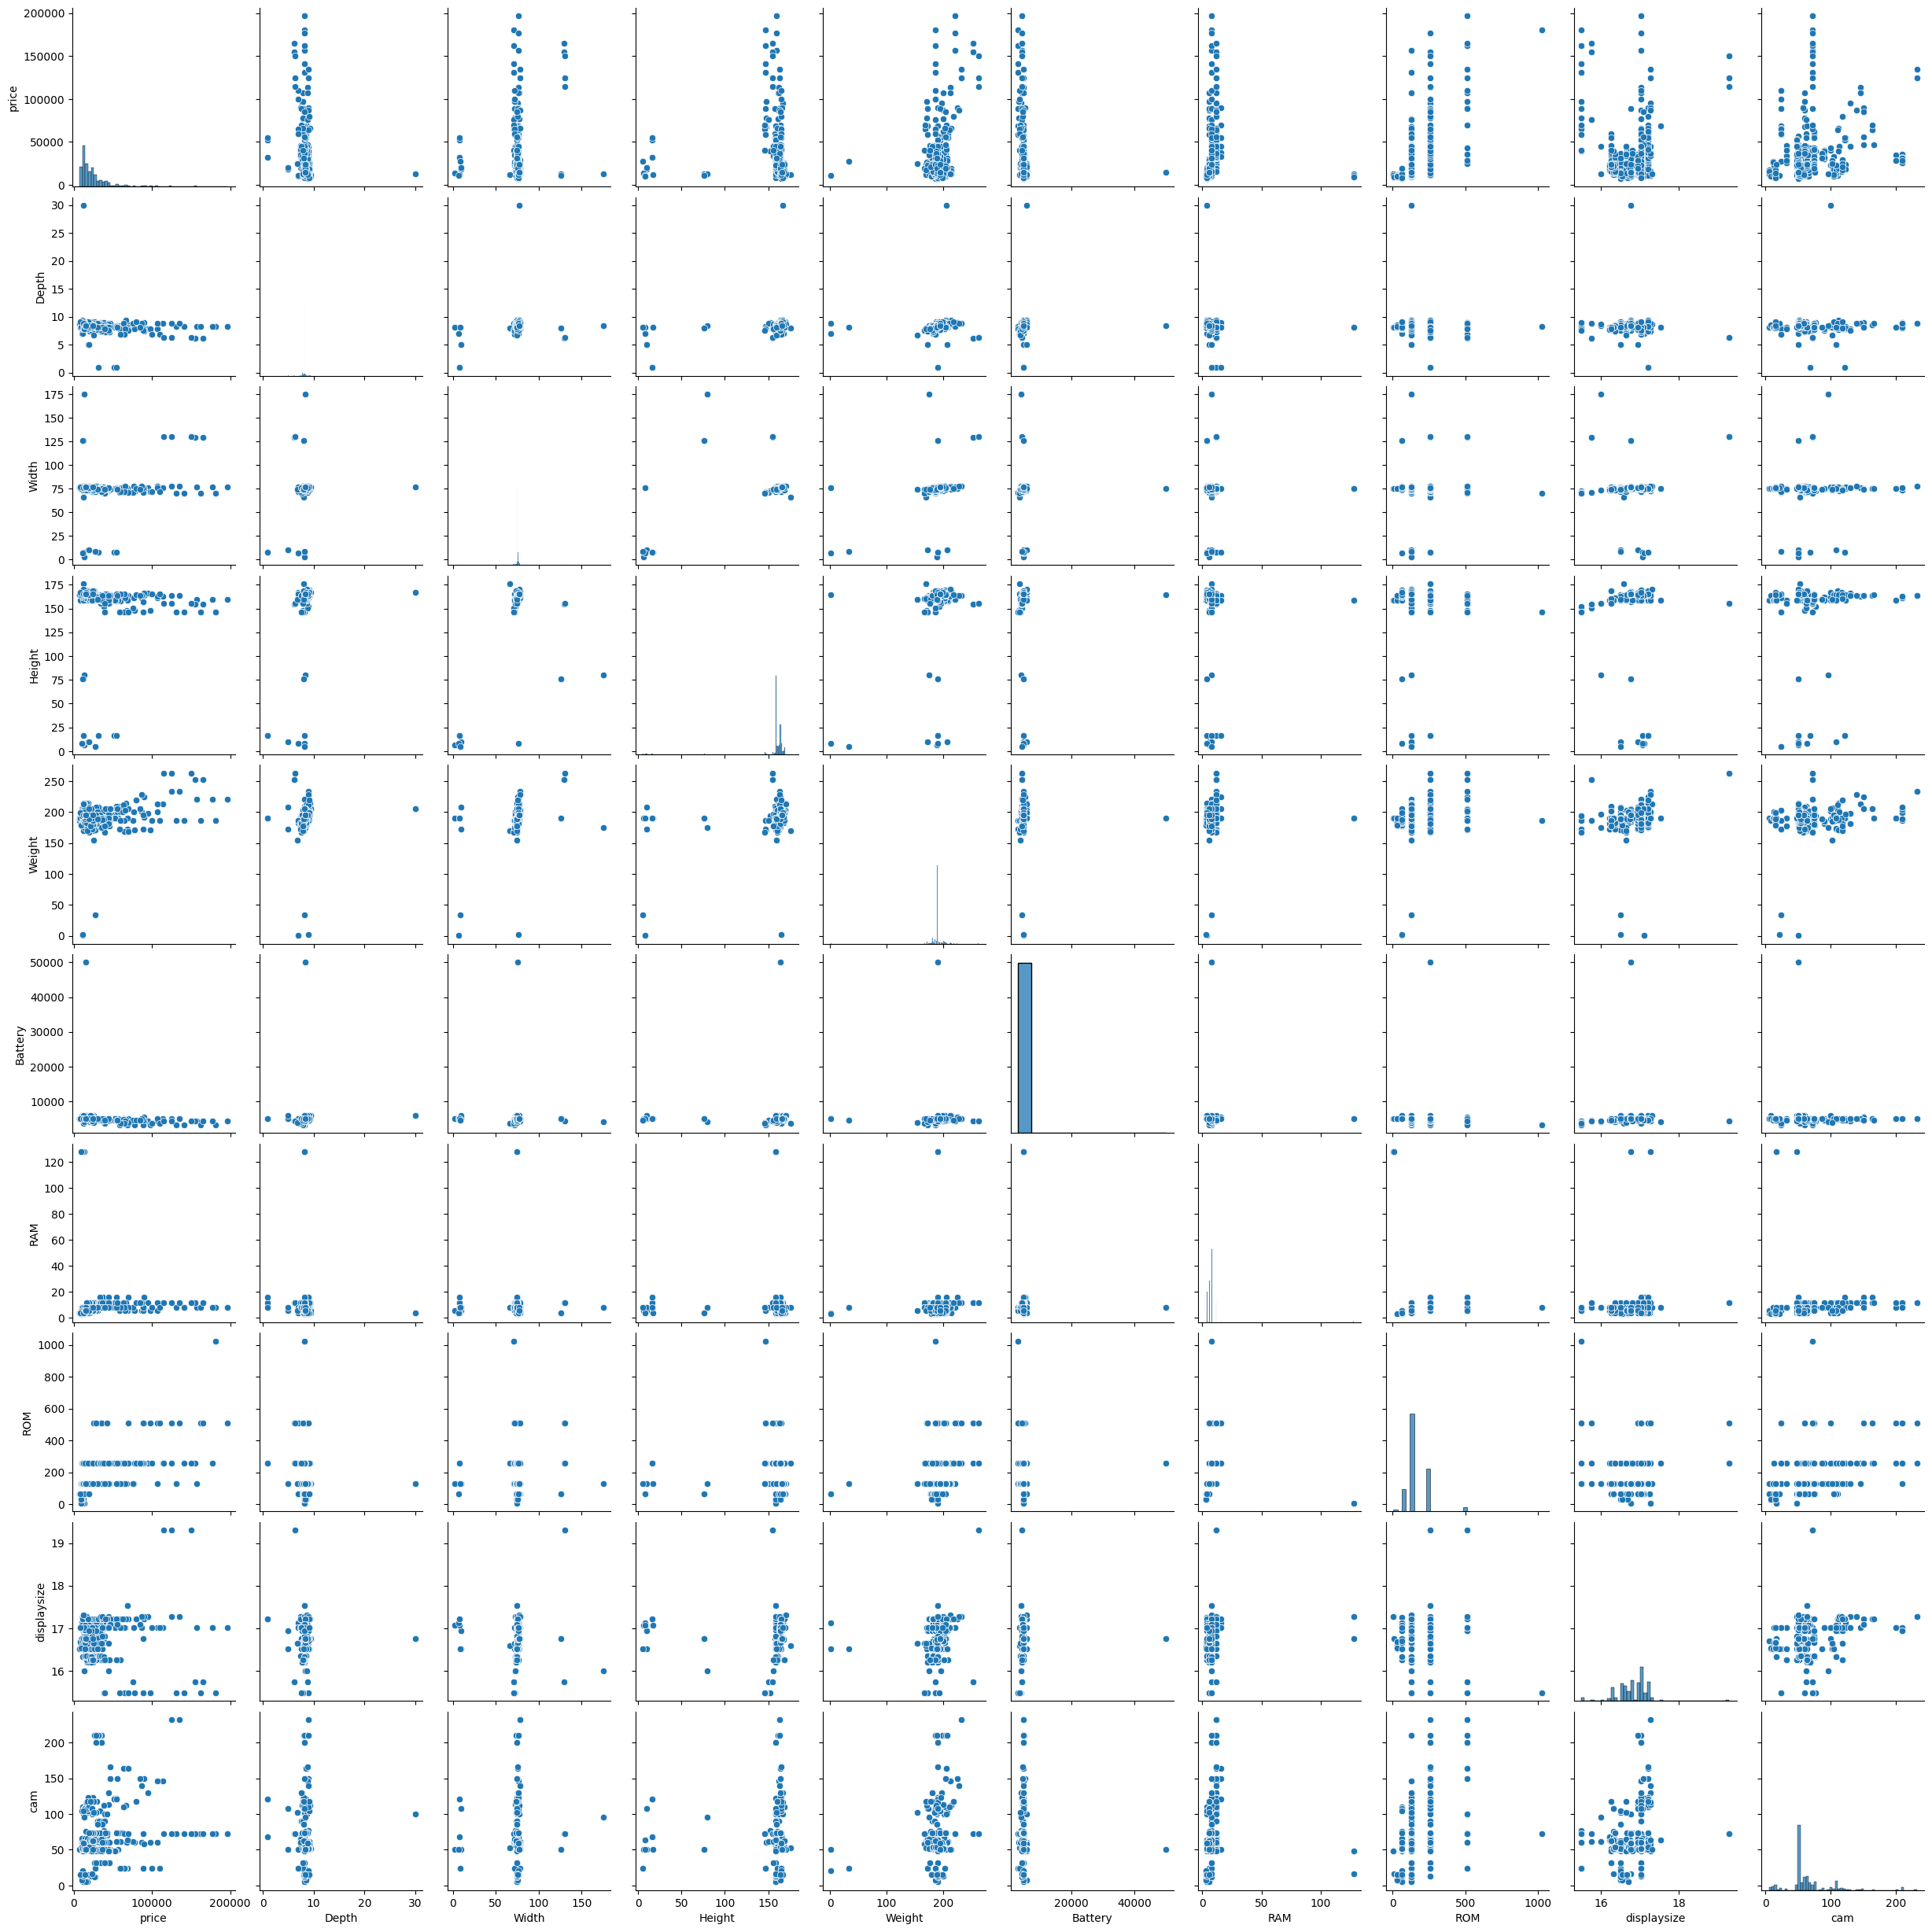

In [86]:
sns.pairplot(num)
plt.show()

<Axes: >

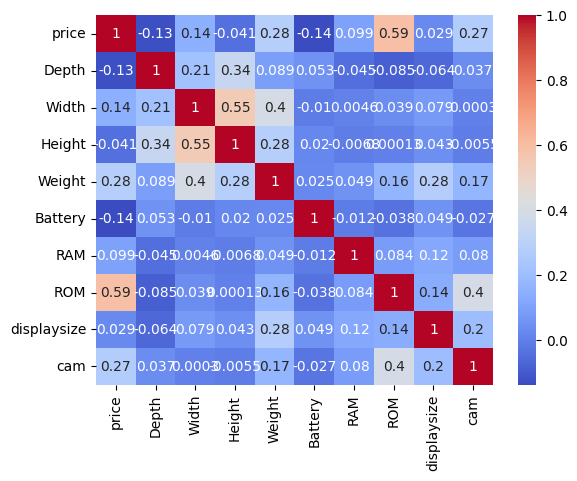

In [87]:
corr = num.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [88]:
import scipy.stats as stats

In [89]:
stats.shapiro(finaldf3['price'])

ShapiroResult(statistic=0.6105931997299194, pvalue=1.0495445686515523e-36)

In [90]:
stats.shapiro(np.log(finaldf3['price']))

ShapiroResult(statistic=0.9146721363067627, pvalue=2.8233918033846385e-19)

In [91]:
stats.shapiro(np.sqrt(finaldf3['price']))

ShapiroResult(statistic=0.7873201370239258, pvalue=4.704839515742442e-29)

In [92]:
def uni_num(data,x):
    sns.boxplot(data=data,y=x)
    plt.show()
    
    sns.histplot(data=data,x=x)
    plt.show()

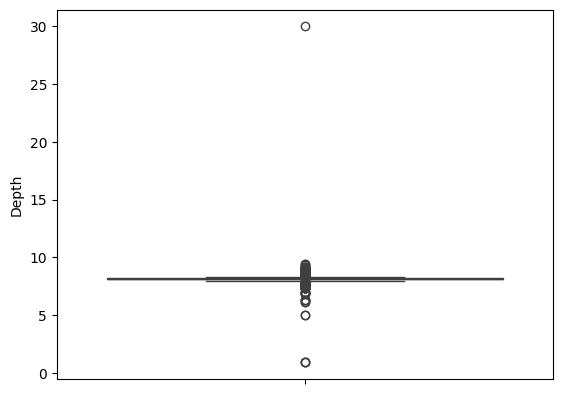

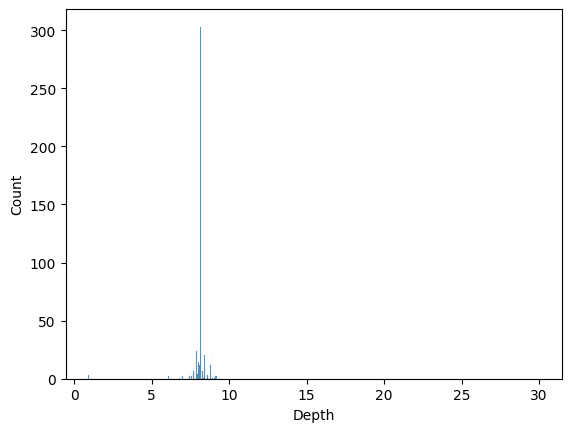

In [93]:
uni_num(data=num,x='Depth')

In [94]:
num.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.90,0.95,0.96,0.97,0.98,0.99])

,price,Depth,Width,Height,Weight,Battery,RAM,ROM,displaysize,cam
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,26529.156295,8.161620,74.896192,158.470066,190.402998,5007.845152,7.769899,161.835022,16.804399,64.388596
std,24694.608390,1.051712,10.229142,19.082751,15.755866,1766.441911,8.330006,93.323943,0.388869,34.517016
min,7649.000000,0.900000,2.700000,5.220000,0.500000,3274.000000,3.000000,6.000000,15.490000,5.000000
1%,9479.000000,6.280000,9.828000,16.500000,168.000000,3342.000000,3.000000,32.000000,15.490000,8.000000
2%,10165.400000,6.900000,70.600000,146.240000,171.000000,3700.000000,4.000000,64.000000,15.698000,12.000000
3%,10292.200000,7.360000,71.570000,146.700000,172.000000,4120.000000,4.000000,64.000000,16.210000,13.000000
4%,10390.000000,7.400000,71.954000,153.740000,172.500000,4300.000000,4.000000,64.000000,16.210000,15.000000
5%,10490.000000,7.460000,72.775000,155.700000,175.000000,4400.000000,4.000000,64.000000,16.260000,15.000000
50%,18589.000000,8.157179,74.895639,158.900000,190.343125,5000.000000,8.000000,128.000000,16.810000,52.000000


In [95]:
def clip(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    
    return x

In [96]:
num['Depth'] = num['Depth'].clip(upper = num['Depth'].quantile(0.99))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2070474569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Depth'] = num['Depth'].clip(upper = num['Depth'].quantile(0.99))


In [97]:
num.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.90,0.95,0.96,0.97,0.98,0.99])

,price,Depth,Width,Height,Weight,Battery,RAM,ROM,displaysize,cam
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,26529.156295,8.130158,74.896192,158.470066,190.402998,5007.845152,7.769899,161.835022,16.804399,64.388596
std,24694.608390,0.642306,10.229142,19.082751,15.755866,1766.441911,8.330006,93.323943,0.388869,34.517016
min,7649.000000,0.900000,2.700000,5.220000,0.500000,3274.000000,3.000000,6.000000,15.490000,5.000000
1%,9479.000000,6.280000,9.828000,16.500000,168.000000,3342.000000,3.000000,32.000000,15.490000,8.000000
2%,10165.400000,6.900000,70.600000,146.240000,171.000000,3700.000000,4.000000,64.000000,15.698000,12.000000
3%,10292.200000,7.360000,71.570000,146.700000,172.000000,4120.000000,4.000000,64.000000,16.210000,13.000000
4%,10390.000000,7.400000,71.954000,153.740000,172.500000,4300.000000,4.000000,64.000000,16.210000,15.000000
5%,10490.000000,7.460000,72.775000,155.700000,175.000000,4400.000000,4.000000,64.000000,16.260000,15.000000
50%,18589.000000,8.157179,74.895639,158.900000,190.343125,5000.000000,8.000000,128.000000,16.810000,52.000000


In [98]:
num['Depth'] = num['Depth'].clip(lower = num['Depth'].quantile(0.01))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\3156273315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Depth'] = num['Depth'].clip(lower = num['Depth'].quantile(0.01))


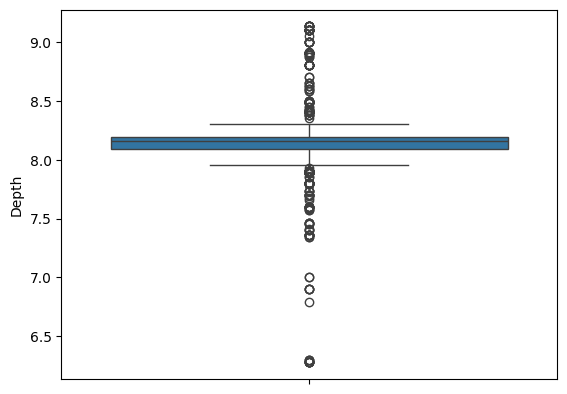

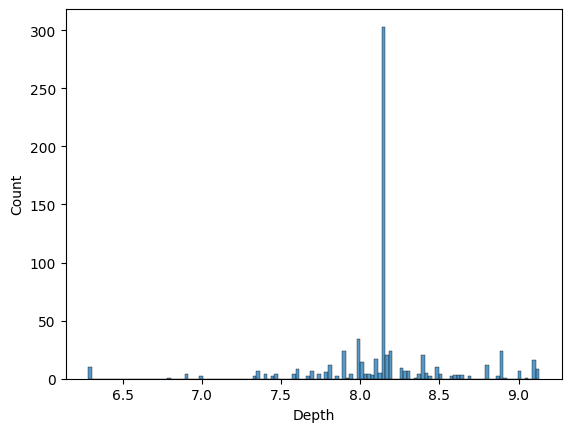

In [99]:
uni_num(data=num,x='Depth')

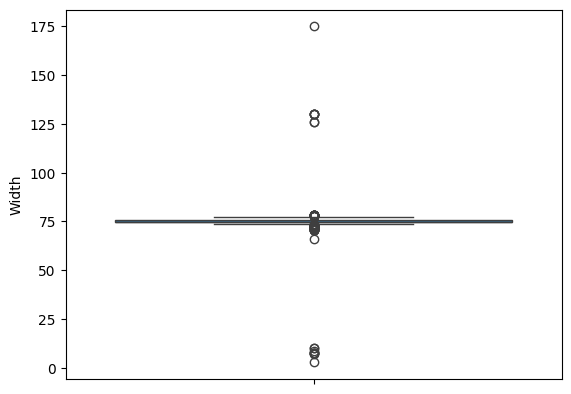

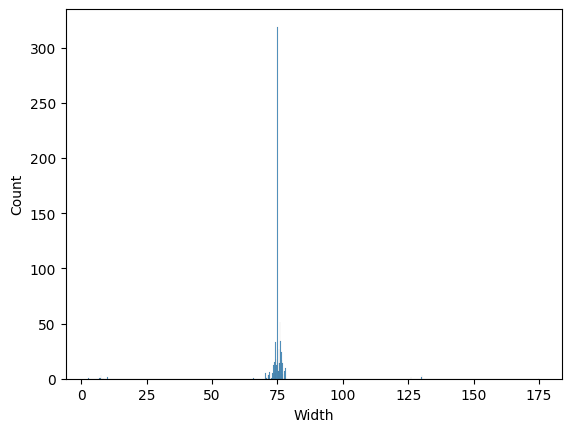

In [100]:
uni_num(data=num,x='Width')

In [101]:
num['Width'] = num['Width'].clip(upper = num['Width'].quantile(0.99))
num['Width'] = num['Width'].clip(lower = num['Width'].quantile(0.01))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2040347442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Width'] = num['Width'].clip(upper = num['Width'].quantile(0.99))
C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2040347442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Width'] = num['Width'].clip(lower = num['Width'].quantile(0.01))


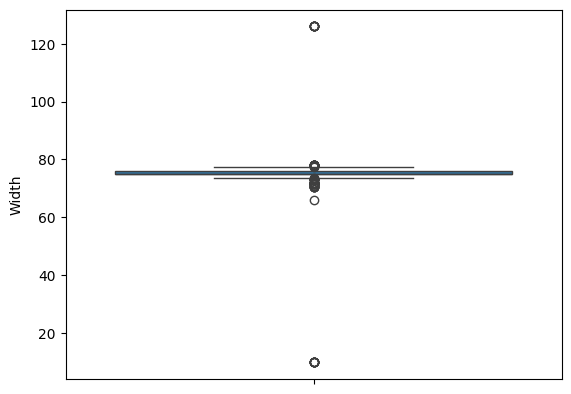

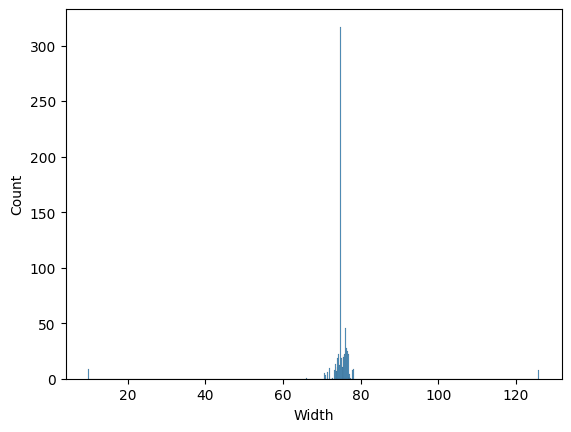

In [102]:
uni_num(data=num,x='Width')

In [103]:
num['Width'] = num['Width'].clip(upper = num['Width'].quantile(0.98))
num['Width'] = num['Width'].clip(lower = num['Width'].quantile(0.02))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2495911450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Width'] = num['Width'].clip(upper = num['Width'].quantile(0.98))
C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2495911450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Width'] = num['Width'].clip(lower = num['Width'].quantile(0.02))


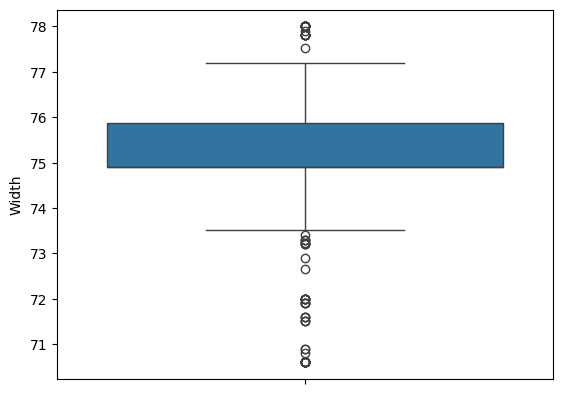

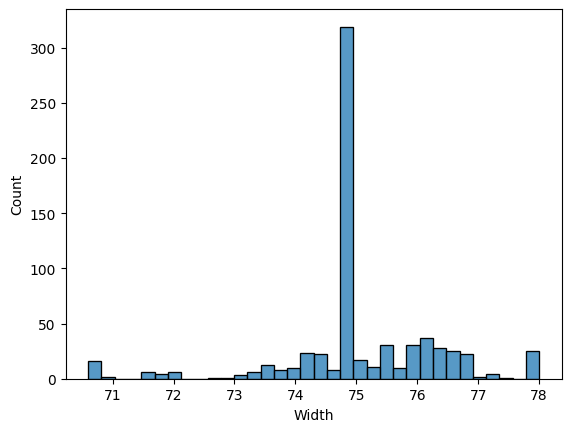

In [104]:
uni_num(data=num,x='Width')

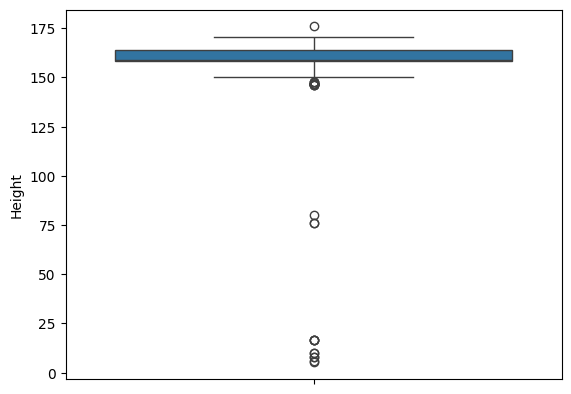

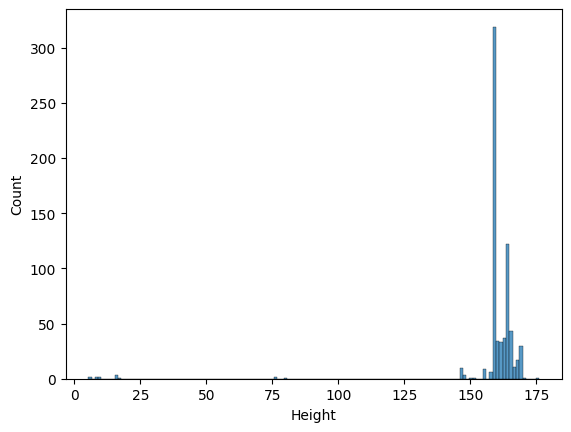

In [105]:
uni_num(data=num,x='Height')

In [106]:
num['Height'] = num['Height'].clip(lower = num['Height'].quantile(0.02))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2910111790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Height'] = num['Height'].clip(lower = num['Height'].quantile(0.02))


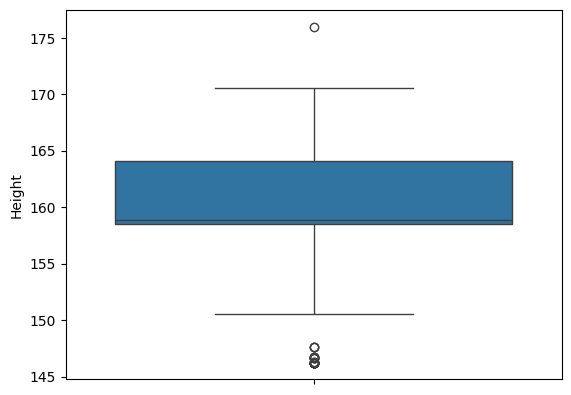

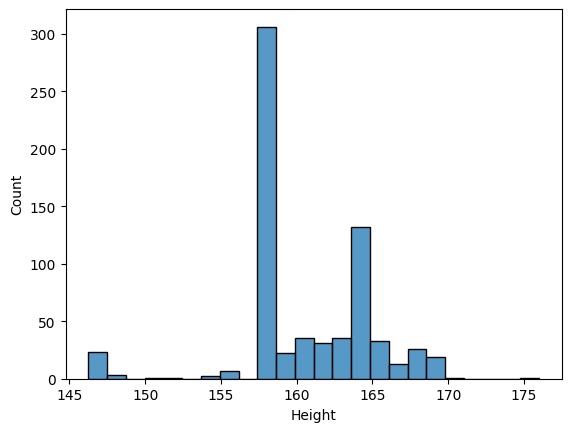

In [107]:
uni_num(data=num,x='Height')

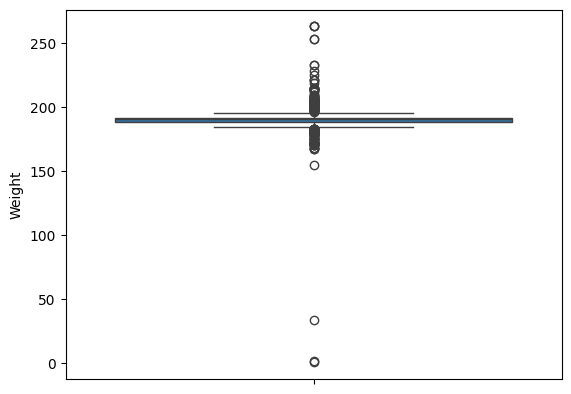

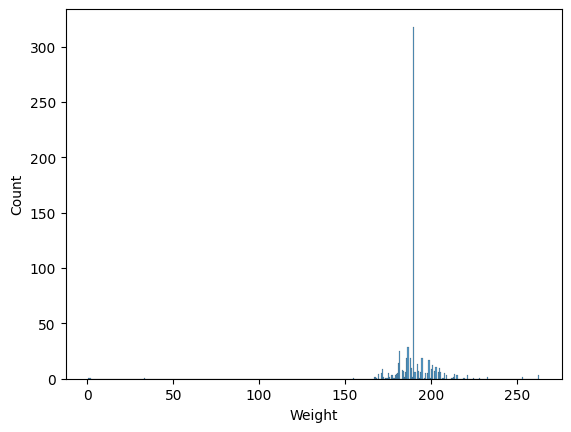

In [108]:
uni_num(data=num,x='Weight')

In [109]:
num['Weight'] = num['Weight'].clip(lower = num['Weight'].quantile(0.01))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2173524376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Weight'] = num['Weight'].clip(lower = num['Weight'].quantile(0.01))


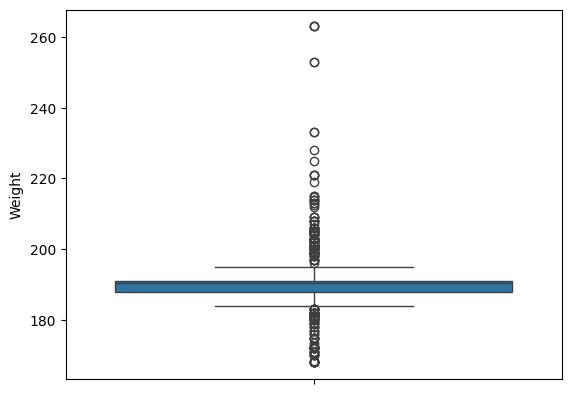

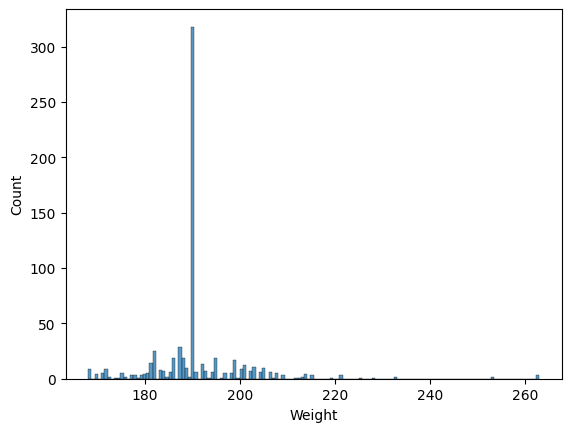

In [110]:
uni_num(data=num,x='Weight')

In [111]:
num['Weight'] = num['Weight'].clip(upper = num['Weight'].quantile(0.99))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\84534916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Weight'] = num['Weight'].clip(upper = num['Weight'].quantile(0.99))


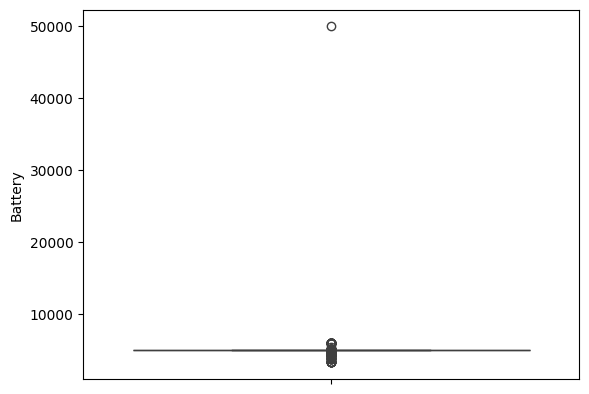

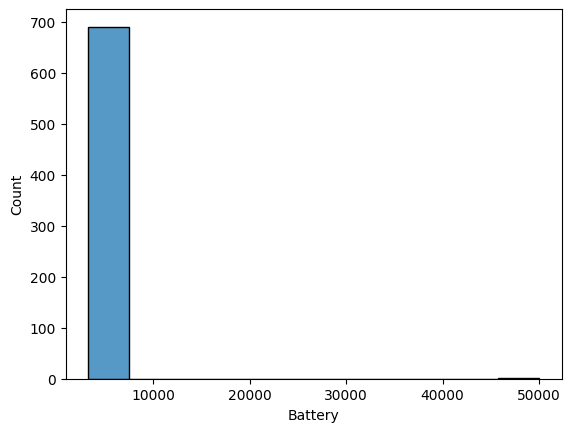

In [112]:
uni_num(data=num,x='Battery')

In [113]:
num['Battery'] = num['Battery'].replace({50000:5000})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\513471480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Battery'] = num['Battery'].replace({50000:5000})


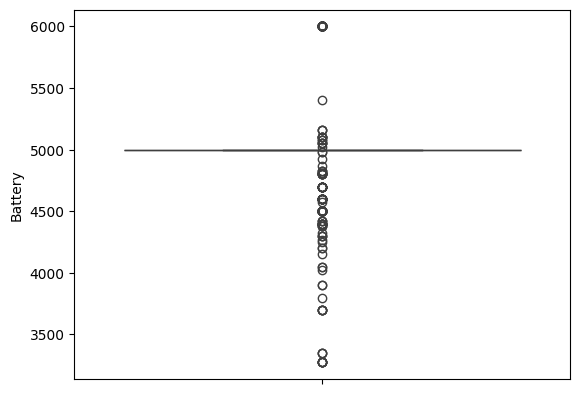

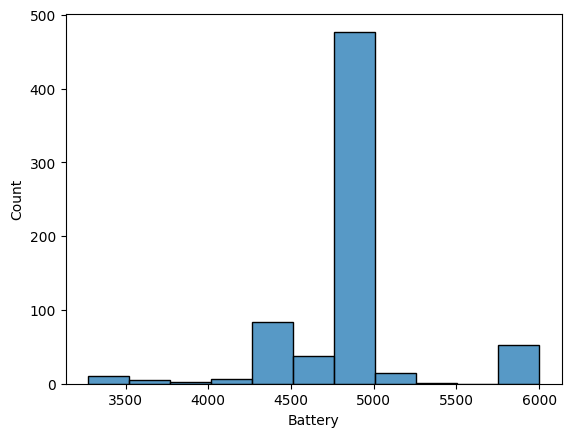

In [114]:
uni_num(data=num,x='Battery')

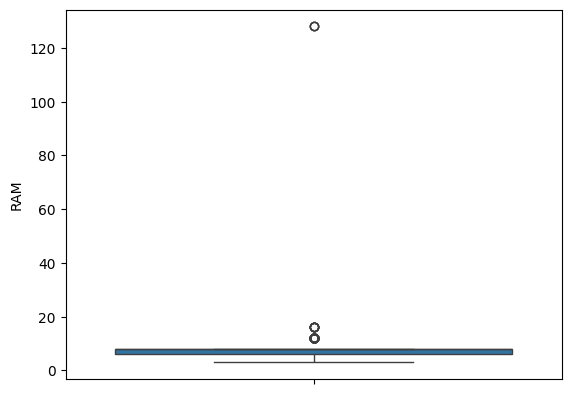

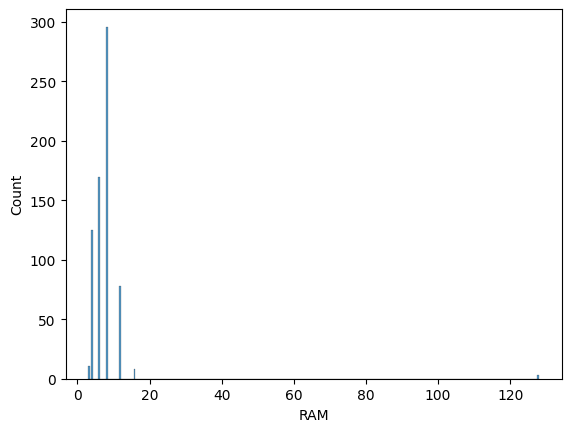

In [115]:
uni_num(data=num,x='RAM')

In [116]:
num['RAM'] = num['RAM'].replace({128:6})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\506954152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['RAM'] = num['RAM'].replace({128:6})


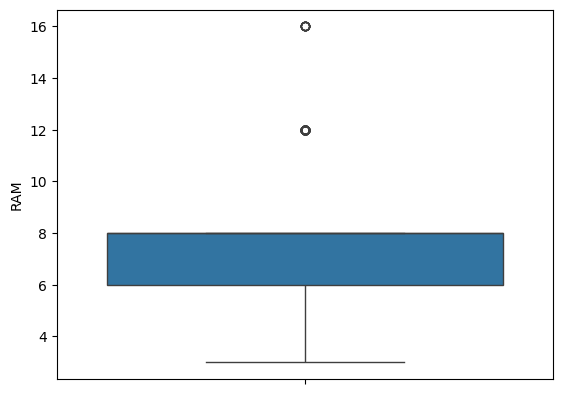

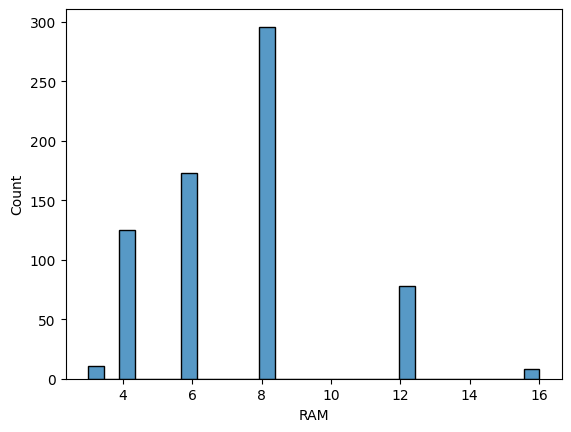

In [117]:
uni_num(data=num,x='RAM')

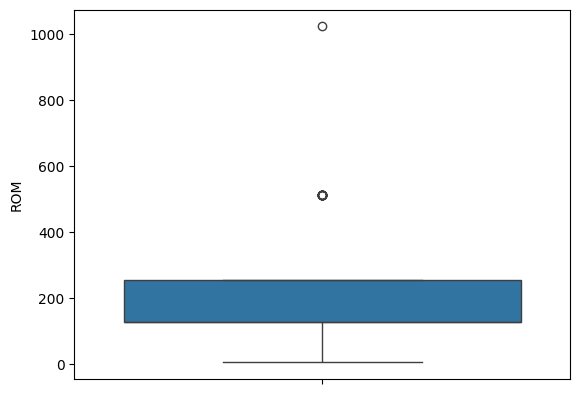

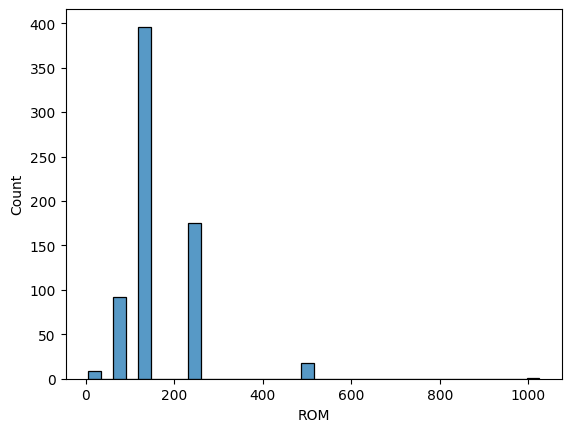

In [118]:
uni_num(data=num,x='ROM')

In [119]:
num['ROM'] = num['ROM'].replace({6:128})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\1744960384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['ROM'] = num['ROM'].replace({6:128})


In [120]:
num['ROM'] = num['ROM'].replace({8:128})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\3540198226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['ROM'] = num['ROM'].replace({8:128})


Number of unique categories:6
--------------------------------------------------
Unique Categories:[ 128.  256.   64.  512. 1024.   32.]
--------------------------------------------------
Number of null values:0


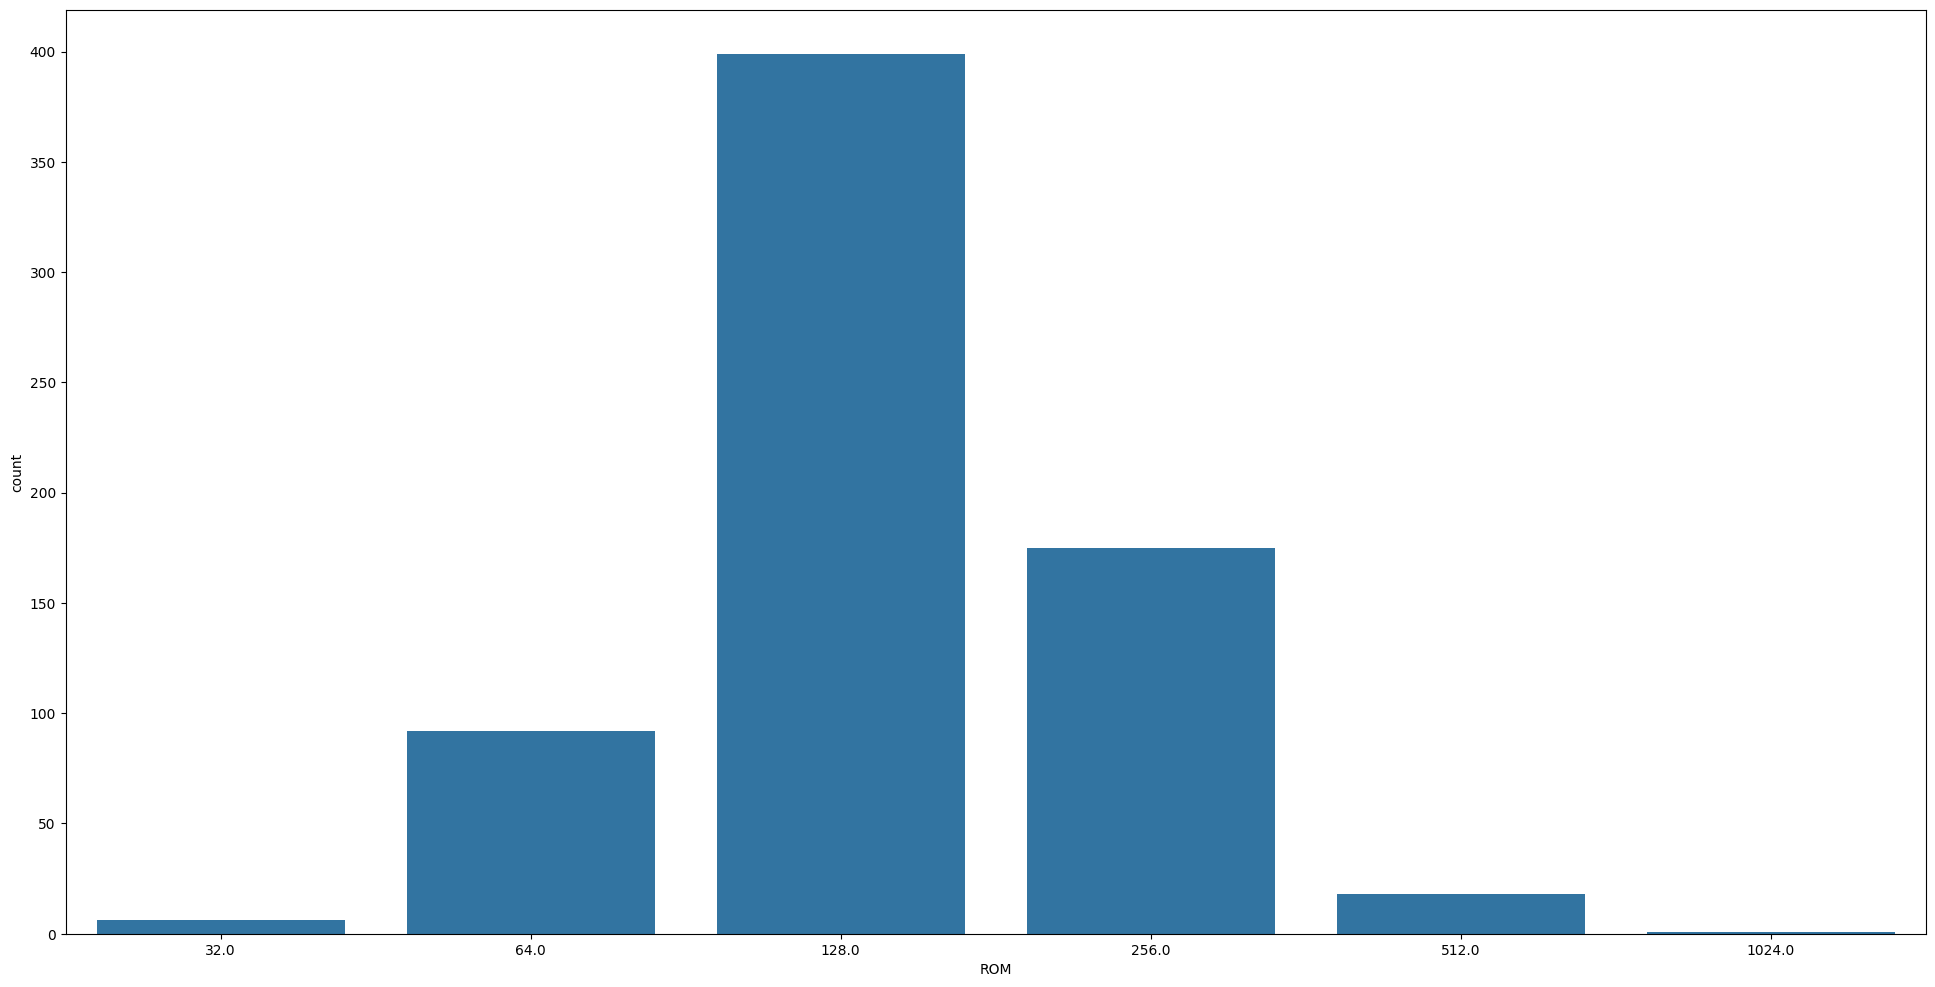

,count,proportion
ROM,,
128.0,399,0.577424
256.0,175,0.253256
64.0,92,0.133140
512.0,18,0.026049
32.0,6,0.008683
1024.0,1,0.001447


In [121]:
uni_cat(data=num,x='ROM')

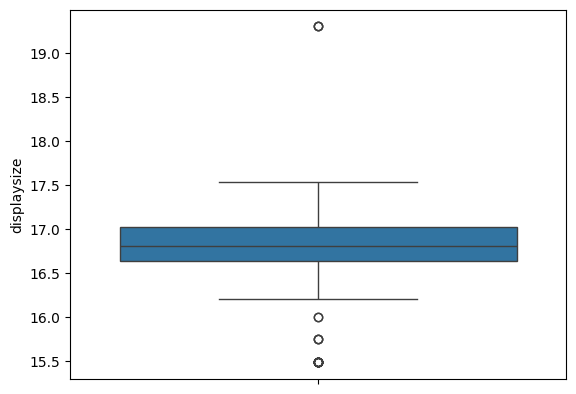

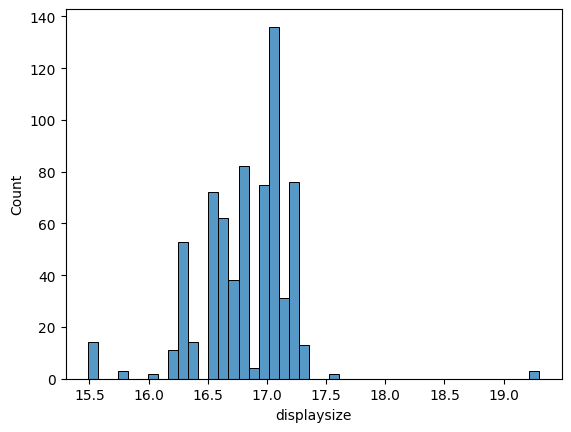

In [122]:
uni_num(data=num,x='displaysize')

In [123]:
num['displaysize'] = num['displaysize'].clip(upper = num['displaysize'].quantile(0.99))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\175555042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['displaysize'] = num['displaysize'].clip(upper = num['displaysize'].quantile(0.99))


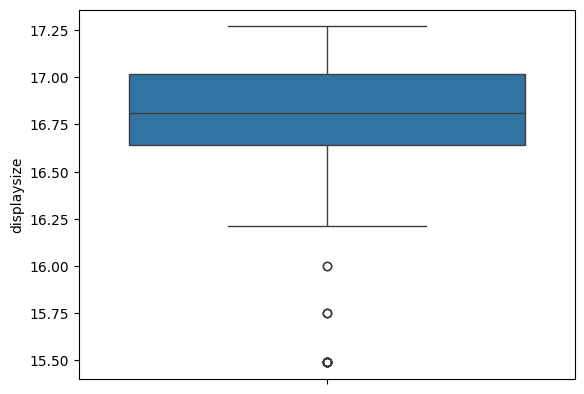

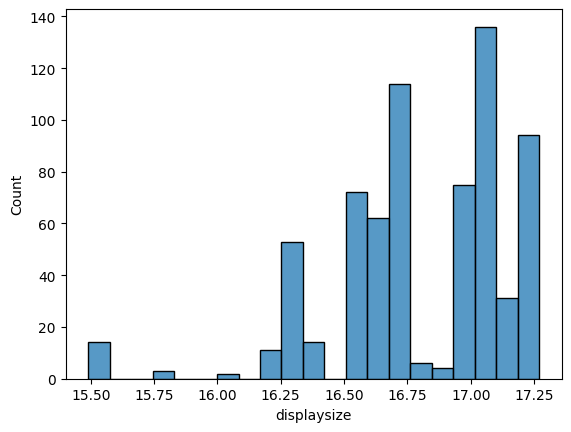

In [124]:
uni_num(data=num,x='displaysize')

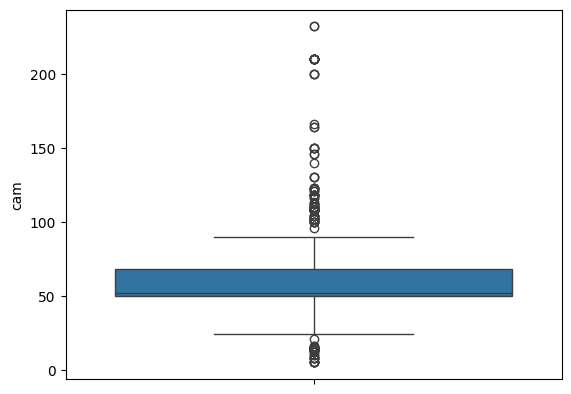

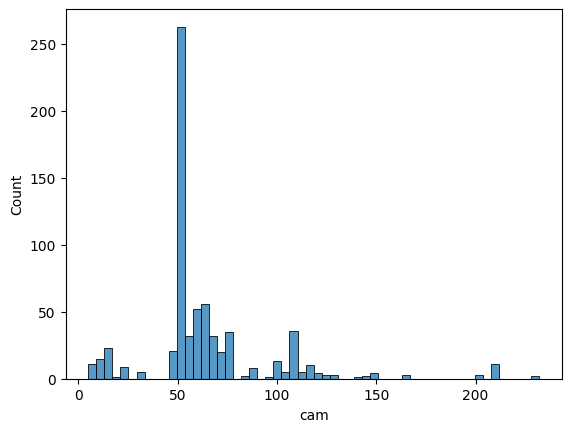

In [125]:
uni_num(data=num,x='cam')

In [126]:
num['cam'] = num['cam'].clip(upper = num['cam'].quantile(0.99))

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\1951557842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['cam'] = num['cam'].clip(upper = num['cam'].quantile(0.99))


In [127]:
cat = finaldf3[finaldf3.dtypes[finaldf3.dtypes==object].index]

In [128]:
cat

,Company,ProcessorB,ProcessorT,displaytype
0,REDMI,Mediatek,Other,Full HD+ Display
1,REDMI,Mediatek,Other,Display
2,REDMI,Mediatek,Other,Full HD+ Display
3,REDMI,Mediatek,Other,Display
4,REDMI,Mediatek,Other,Display
...,...,...,...,...
979,SAMSUNG,Exynos,Exynos Core,Full HD+ Display
980,SAMSUNG,Exynos,Exynos Core,Full HD+ Display
981,SAMSUNG,Exynos,Other,Full HD+ Display
982,SAMSUNG,Exynos,Other,Full HD+ Display


Number of unique categories:74
--------------------------------------------------
Unique Categories:['Other' 'Helio G85' 'Dimensity 7050' 'Dimensity 8200' 'Dimensity 8020'
 'Dimensity D8300 Ultra' 'Snapdragon 7s Gen' 'Dimensity 7030'
 'Dimensity 9300' 'Dimensity 6100+' 'Exynos 1280' 'Dimensity 6020'
 'Dimensity 7200 Ultra' 'Exynos 2200' 'Dimensity 6080' 'Snapdragon 4 Gen'
 'MediaTek Dimensity 7050' 'Snapdragon 680' 'Tensor G3' 'Unisoc T616'
 'Snapdragon 695' 'Helio G99' 'Dimensity 9200' 'Snapdragon 778G'
 'Exynos 1330' 'Dimensity 6100' 'Unisoc T612' 'Snapdragon 8+ Gen'
 'A17 Pro Chip' 'A16 Bionic Chip' 'Tensor G2' 'Dimensity 7200'
 'Snapdragon 888' 'Dimensity 8050' 'Dimensity 1080' 'Dimensity 6833'
 'Dimesity 8050' 'Snapdragon 8 Gen' 'Helio G88' 'Helio G96'
 'Dimensity 7020' 'Helio G37' 'Exynos 850' 'Dimension 700'
 'Dimensity 1300' 'Snapdragon 7+ Gen' 'Helio P70' 'Helio A22' 'Helio G70'
 'Helio P35' 'Snapdragon 685' 'Dimensity 9000' 'A15 Bionic Chip'
 'Exynos 1380' 'Dimensity 9000+' '

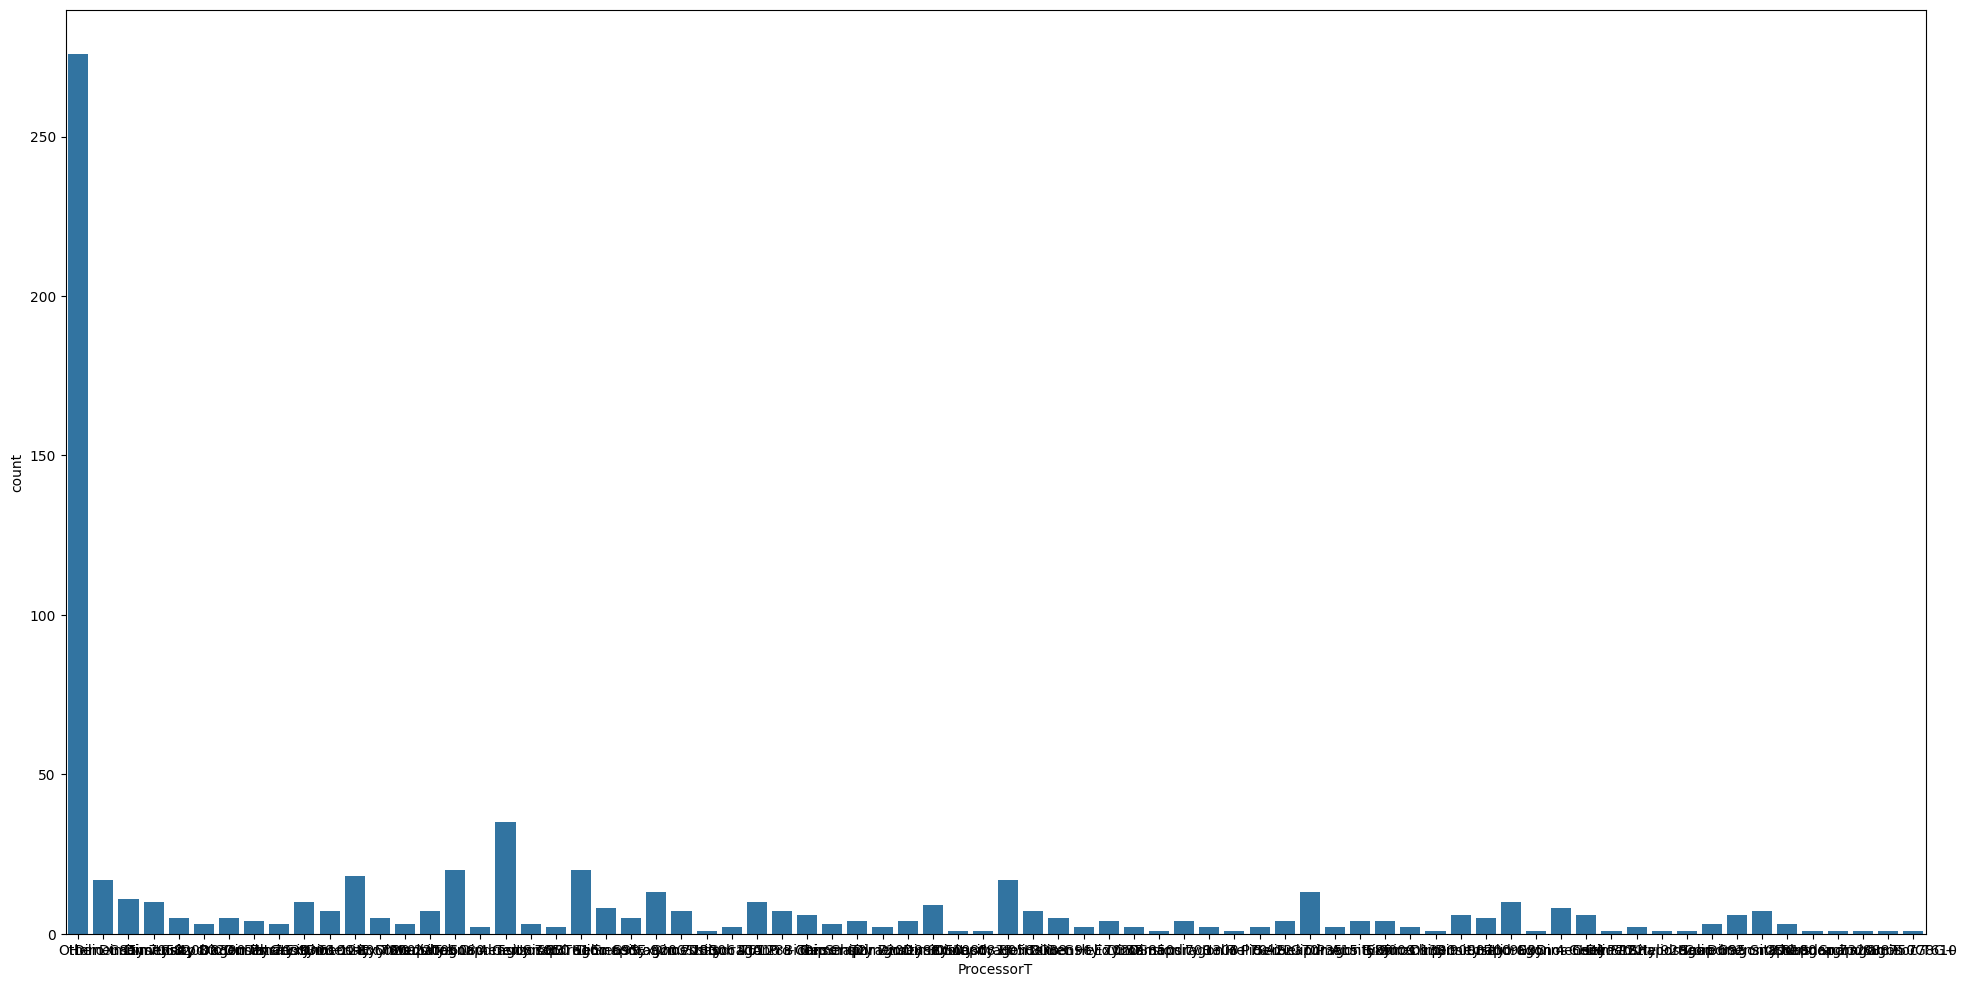

,count,proportion
ProcessorT,,
Other,276,0.399421
Snapdragon 680,35,0.050651
Snapdragon 695,20,0.028944
Snapdragon 4 Gen,20,0.028944
Dimensity 6020,18,0.026049
...,...,...
Snapdragon 732G,1,0.001447
Snapdragon 888+,1,0.001447
Snapdragon 750G,1,0.001447


In [129]:
uni_cat(data=cat,x='ProcessorT')

Number of unique categories:8
--------------------------------------------------
Unique Categories:['Mediatek' 'Snapdragon' 'Exynos' 'Qualcomm' 'Google' 'NA' 'Unisoc'
 'Apple']
--------------------------------------------------
Number of null values:0


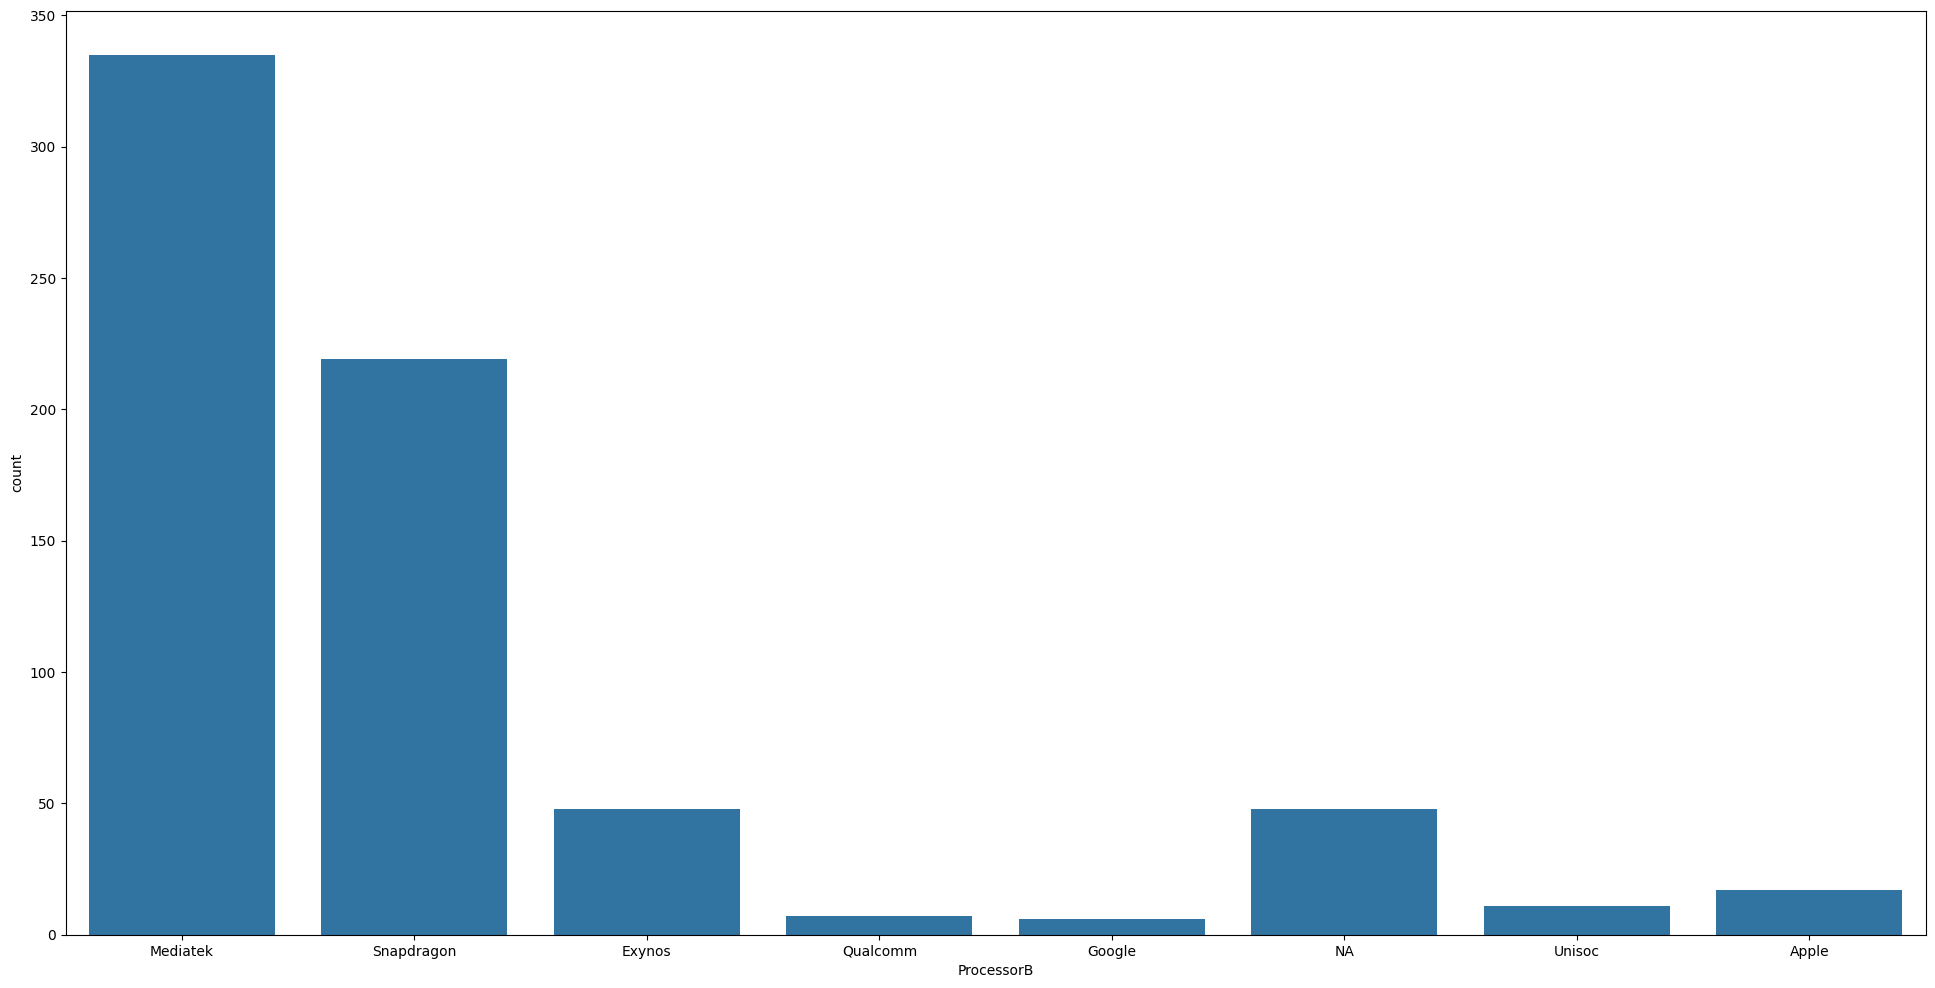

,count,proportion
ProcessorB,,
Mediatek,335,0.484805
Snapdragon,219,0.316932
Exynos,48,0.069465
NA,48,0.069465
Apple,17,0.024602
Unisoc,11,0.015919
Qualcomm,7,0.010130
Google,6,0.008683


In [130]:
uni_cat(data=cat,x='ProcessorB')

In [131]:
cat['ProcessorB'] = cat['ProcessorB'].replace({"Snapdragon":"Qualcomm",'NA':'Others'})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\3836812794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['ProcessorB'] = cat['ProcessorB'].replace({"Snapdragon":"Qualcomm",'NA':'Others'})


Number of unique categories:7
--------------------------------------------------
Unique Categories:['Mediatek' 'Qualcomm' 'Exynos' 'Google' 'Others' 'Unisoc' 'Apple']
--------------------------------------------------
Number of null values:0


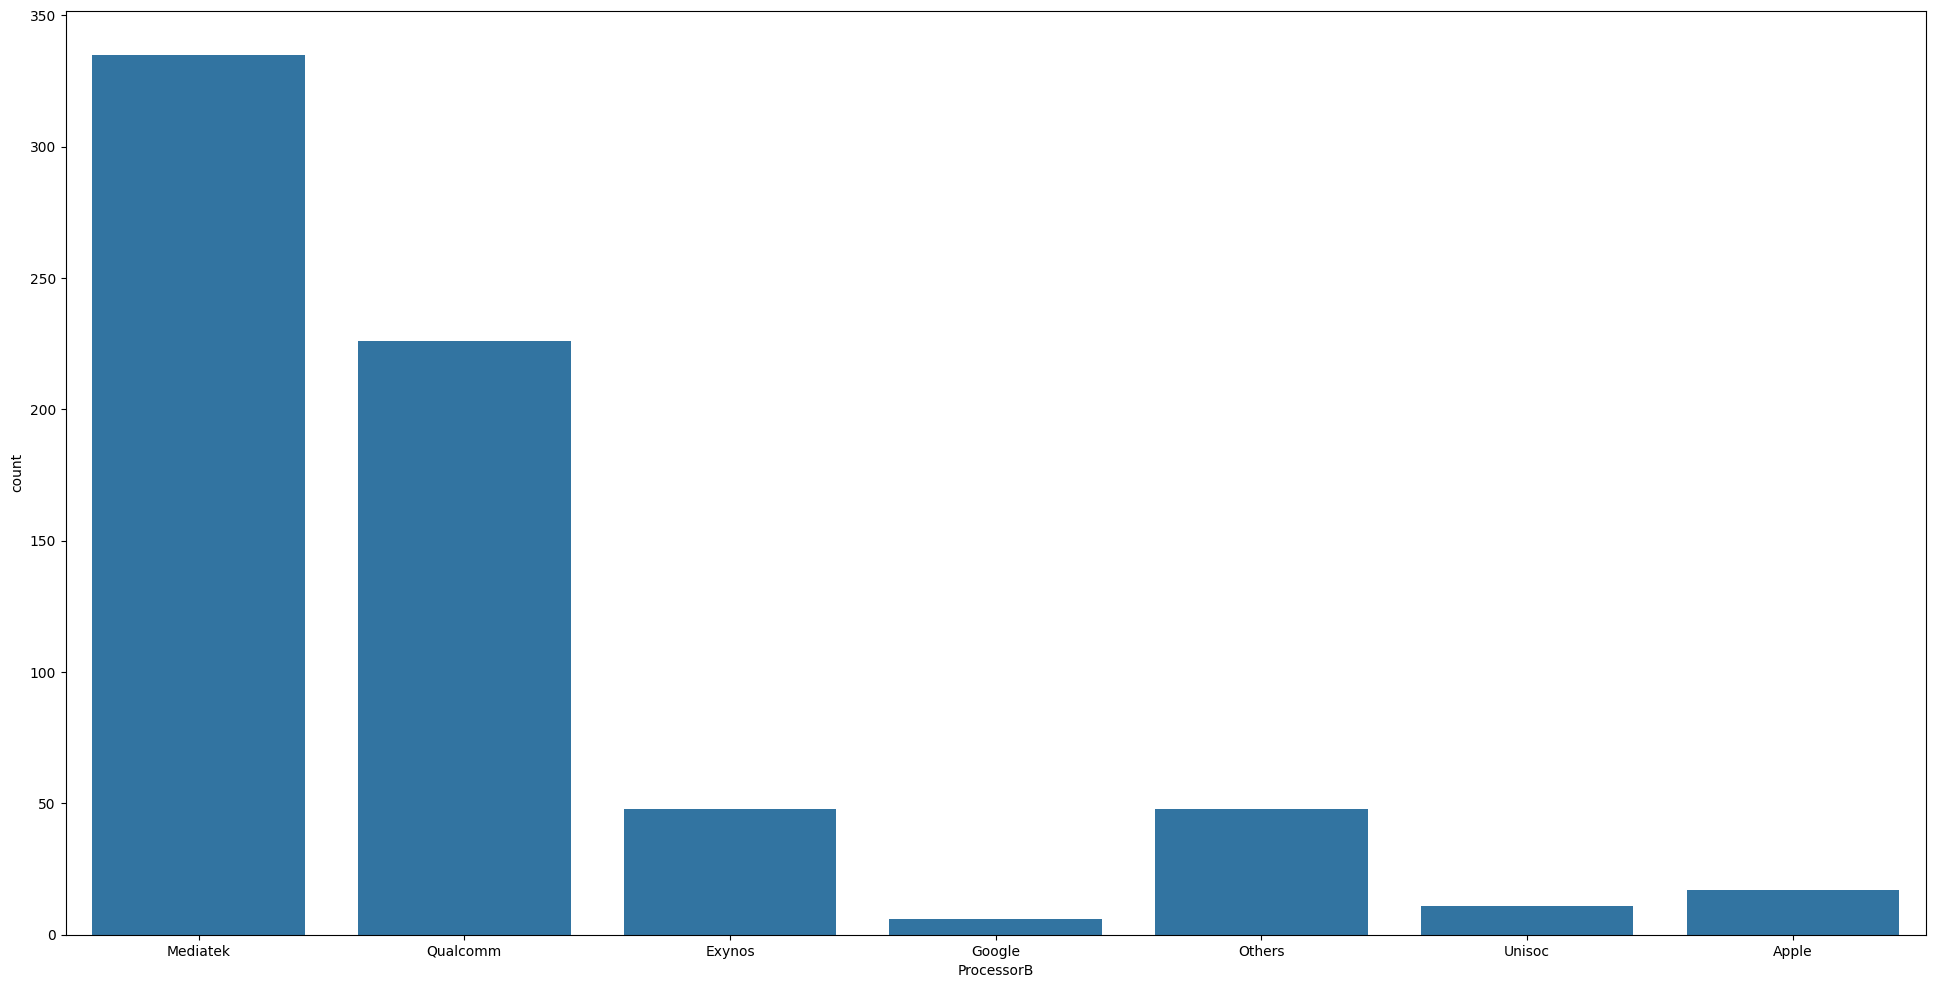

,count,proportion
ProcessorB,,
Mediatek,335,0.484805
Qualcomm,226,0.327062
Exynos,48,0.069465
Others,48,0.069465
Apple,17,0.024602
Unisoc,11,0.015919
Google,6,0.008683


In [132]:
uni_cat(data=cat,x='ProcessorB')

Number of unique categories:11
--------------------------------------------------
Unique Categories:[' Full HD+ Display' ' Display' ' HD+ Display' ' Full HD+ AMOLED Display'
 ' Full HD Display' ' HD Display' ' Super Retina XDR Display'
 ' Full HD+ E3 Super AMOLED Display' ' Full HD+ Super AMOLED Display'
 ' Quad HD+ Display' ' Quad HD Display']
--------------------------------------------------
Number of null values:0


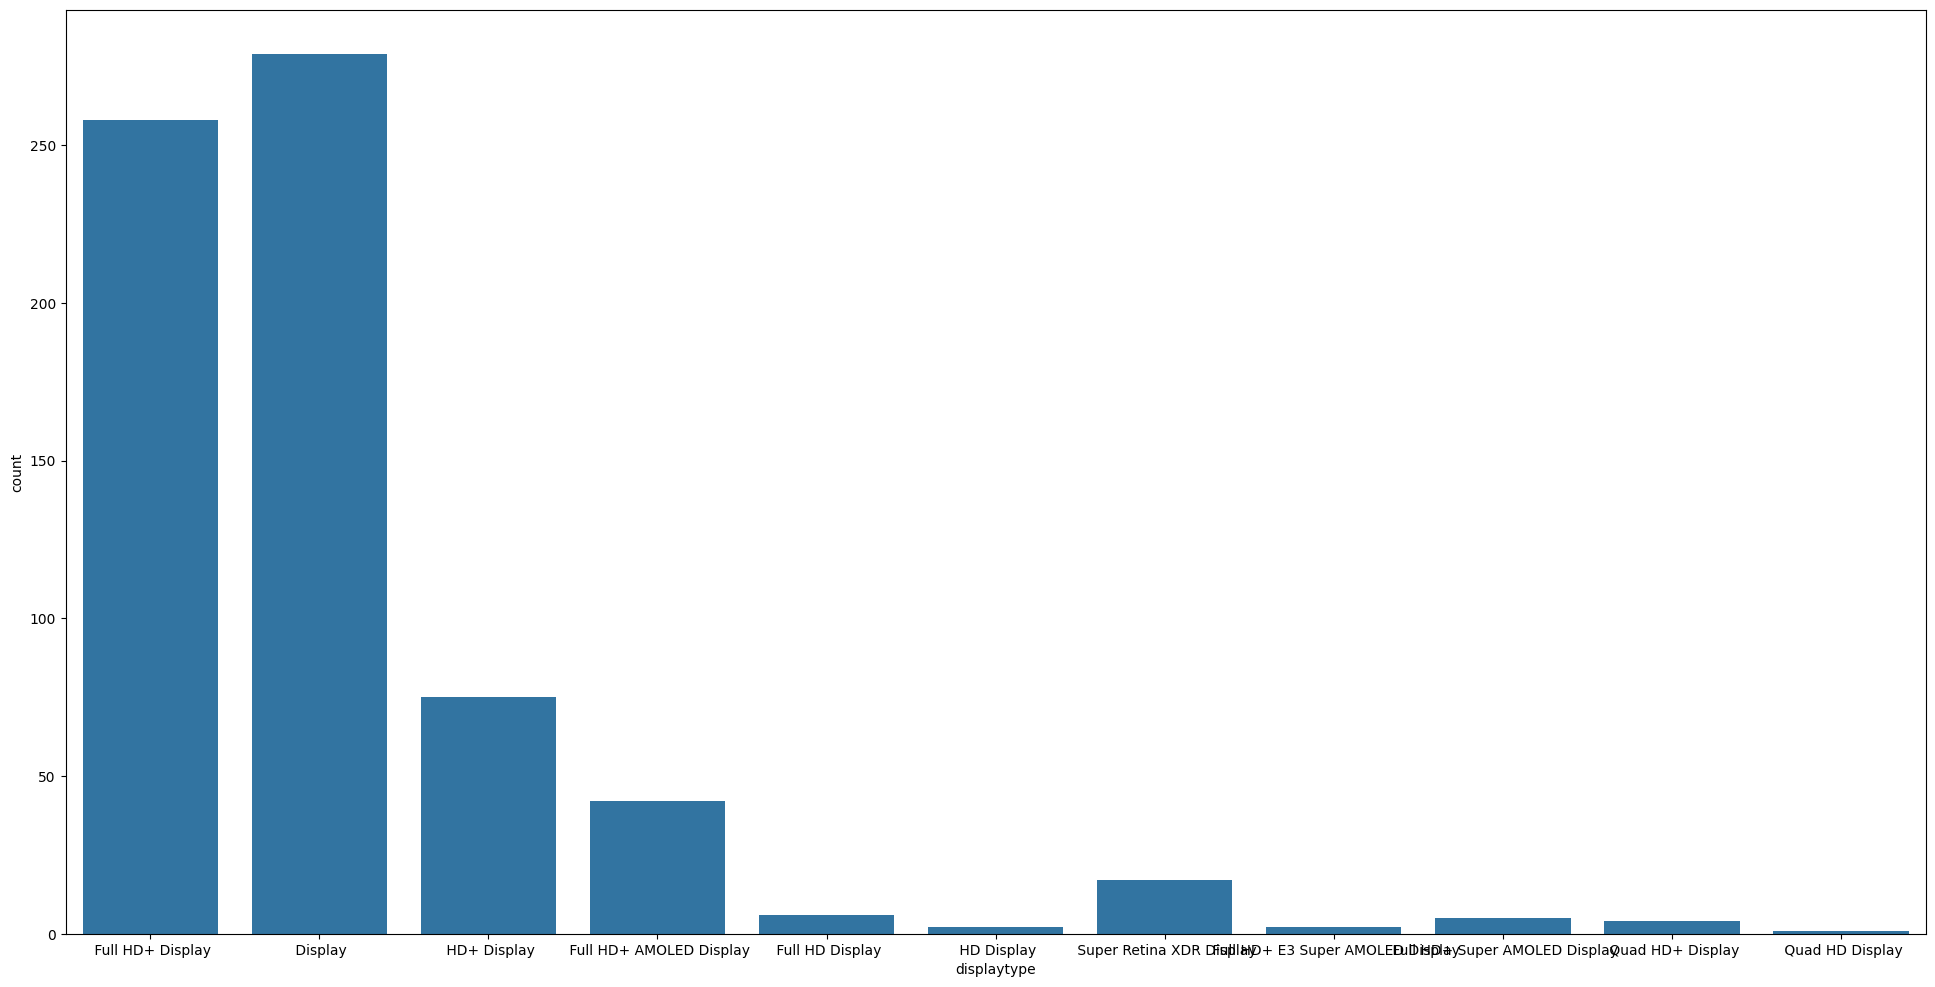

,count,proportion
displaytype,,
Display,279,0.403763
Full HD+ Display,258,0.373372
HD+ Display,75,0.108538
Full HD+ AMOLED Display,42,0.060781
Super Retina XDR Display,17,0.024602
Full HD Display,6,0.008683
Full HD+ Super AMOLED Display,5,0.007236
Quad HD+ Display,4,0.005789
HD Display,2,0.002894


In [133]:
uni_cat(data=cat,x='displaytype')

In [140]:
cat['displaytype'] = cat['displaytype'].replace({'Display':'HD Display','Quad HD Display':'HD Display'})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\3465933891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['displaytype'] = cat['displaytype'].replace({'Display':'HD Display','Quad HD Display':'HD Display'})


Number of unique categories:11
--------------------------------------------------
Unique Categories:[' Full HD+ Display' ' Display' ' HD+ Display' ' Full HD+ AMOLED Display'
 ' Full HD Display' ' HD Display' ' Super Retina XDR Display'
 ' Full HD+ E3 Super AMOLED Display' ' Full HD+ Super AMOLED Display'
 ' Quad HD+ Display' ' Quad HD Display']
--------------------------------------------------
Number of null values:0


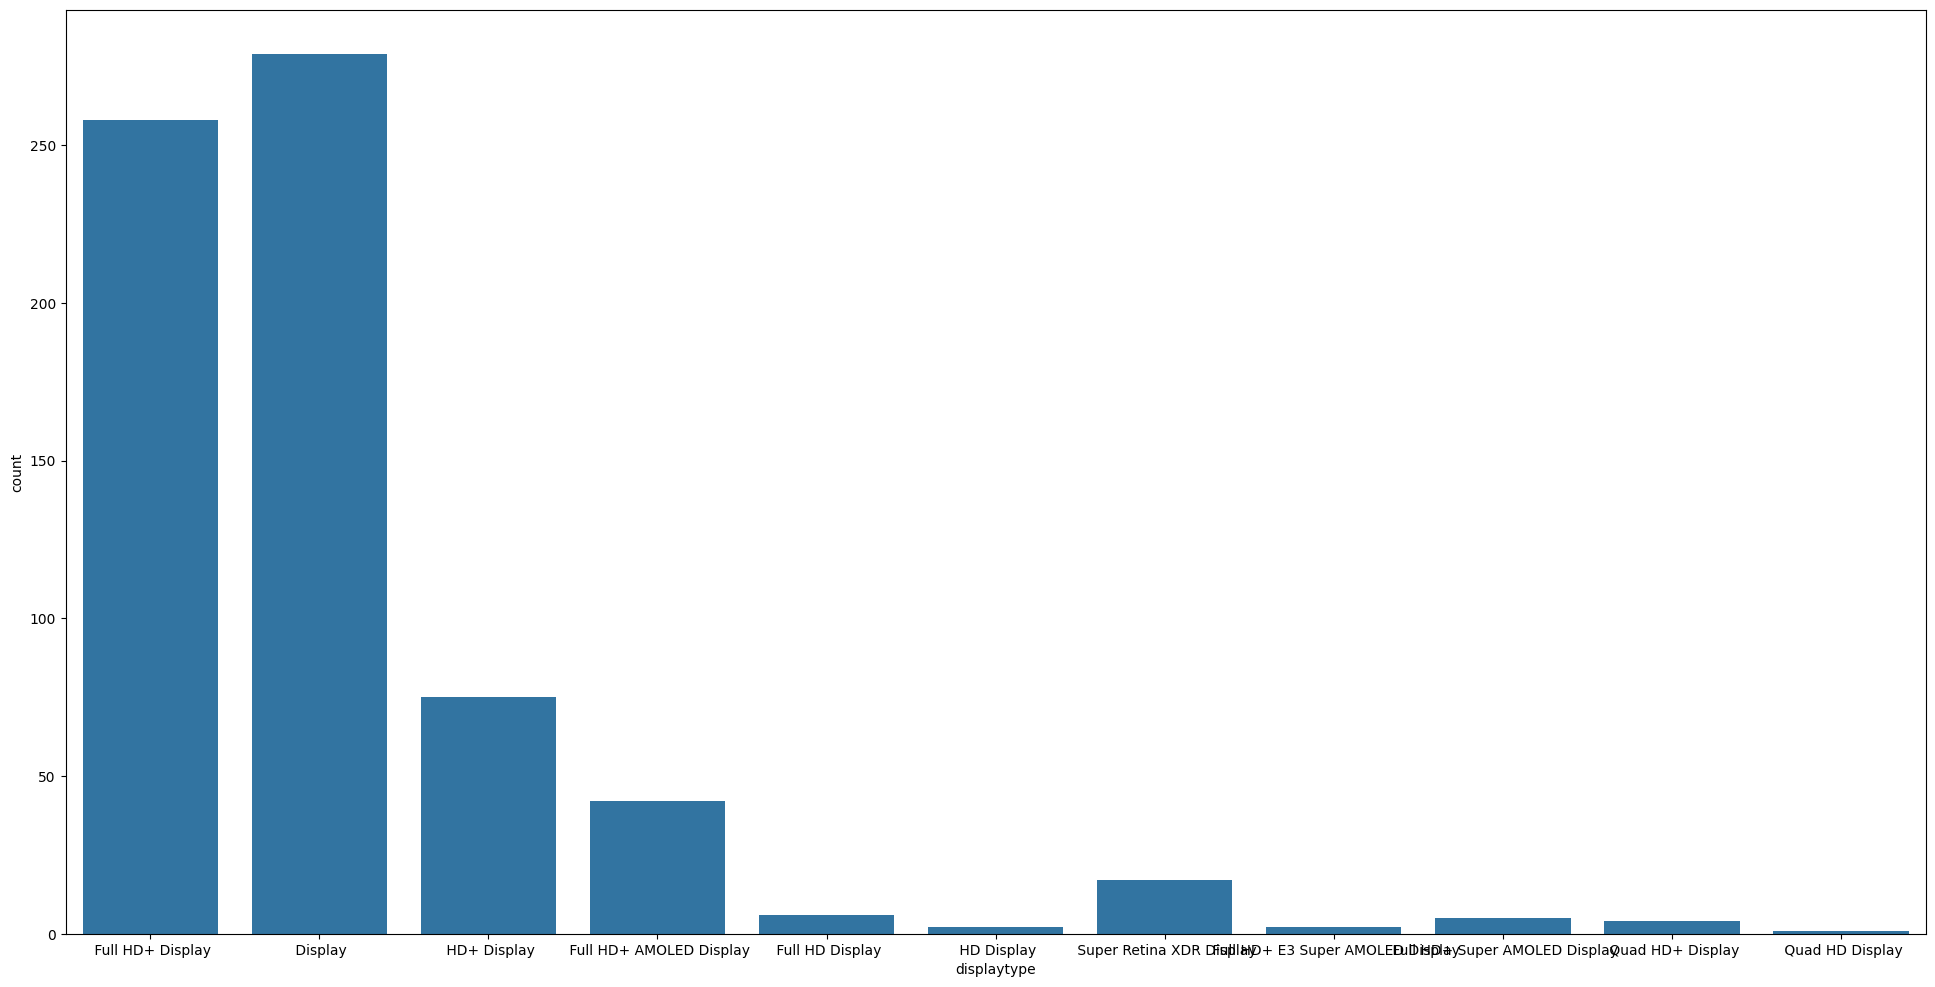

,count,proportion
displaytype,,
Display,279,0.403763
Full HD+ Display,258,0.373372
HD+ Display,75,0.108538
Full HD+ AMOLED Display,42,0.060781
Super Retina XDR Display,17,0.024602
Full HD Display,6,0.008683
Full HD+ Super AMOLED Display,5,0.007236
Quad HD+ Display,4,0.005789
HD Display,2,0.002894


In [142]:
uni_cat(data=cat,x='displaytype')

Number of unique categories:29
--------------------------------------------------
Unique Categories:['REDMI' 'OPPO' 'SAMSUNG' 'Tecno' 'POCO' 'MOTOROLA' 'vivo' 'realme'
 'Razar' 'LAVA' 'Google' 'Nokia' 'OnePlus' 'Honor' 'itel' 'Nothing' 'IQOO'
 'Apple' 'NOTE' 'Samsung' 'Infinix' '12' 'razr' 'Mi' 'Elephone' 'Redmi'
 '11' 'Pluzz' 'Xiaomi']
--------------------------------------------------
Number of null values:0


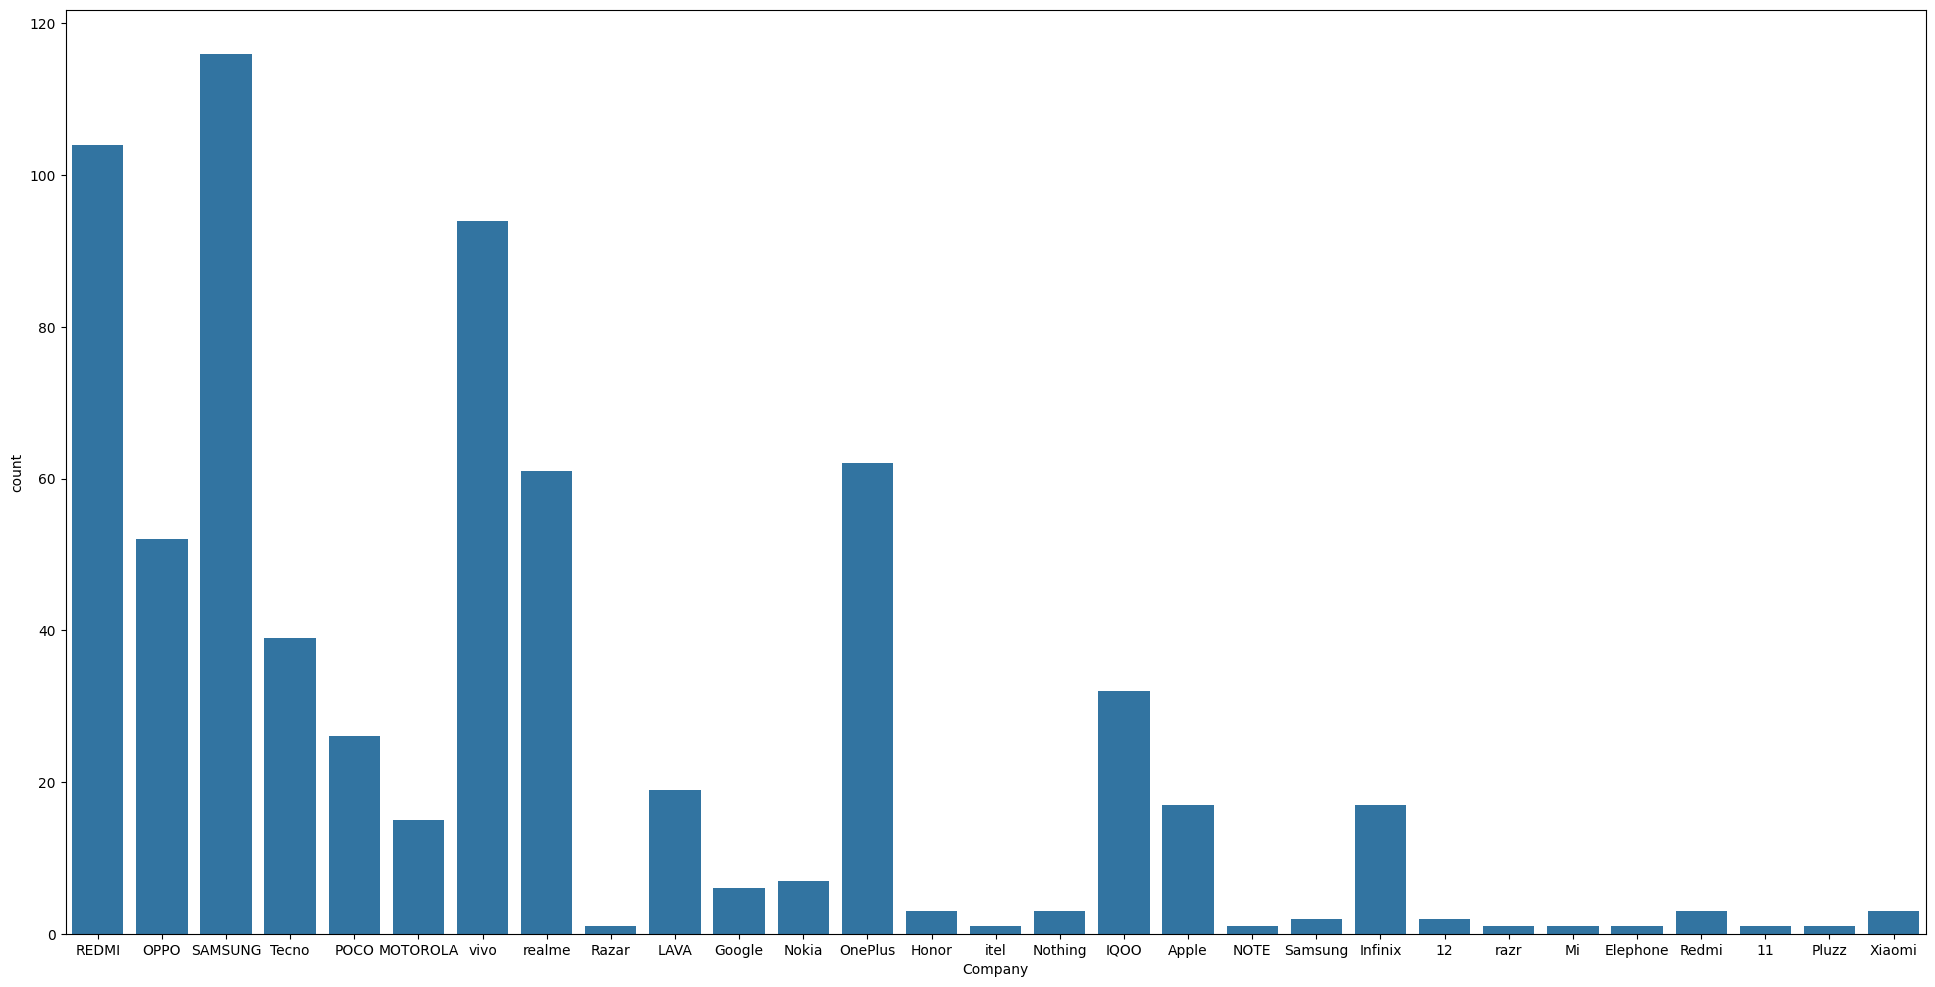

,count,proportion
Company,,
SAMSUNG,116,0.167873
REDMI,104,0.150507
vivo,94,0.136035
OnePlus,62,0.089725
realme,61,0.088278
OPPO,52,0.075253
Tecno,39,0.056440
IQOO,32,0.046310
POCO,26,0.037627


In [144]:
uni_cat(data=cat,x='Company')

In [145]:
cat['Company'] = cat['Company'].replace({"Razar":"MOTOROLA","razr":"MOTOROLA",
                                                   "Mi":"REDMI","Samsung":"SAMSUNG",
                                                   "NOTE":"REDMI","11":"Other","12":"Other","Redmi":"REDMI",
                                                   "Elephone":"Other","Pluzz":"Other","itel":"Other"})

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_29952\2604167303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['Company'] = cat['Company'].replace({"Razar":"MOTOROLA","razr":"MOTOROLA",


Number of unique categories:19
--------------------------------------------------
Unique Categories:['REDMI' 'OPPO' 'SAMSUNG' 'Tecno' 'POCO' 'MOTOROLA' 'vivo' 'realme' 'LAVA'
 'Google' 'Nokia' 'OnePlus' 'Honor' 'Other' 'Nothing' 'IQOO' 'Apple'
 'Infinix' 'Xiaomi']
--------------------------------------------------
Number of null values:0


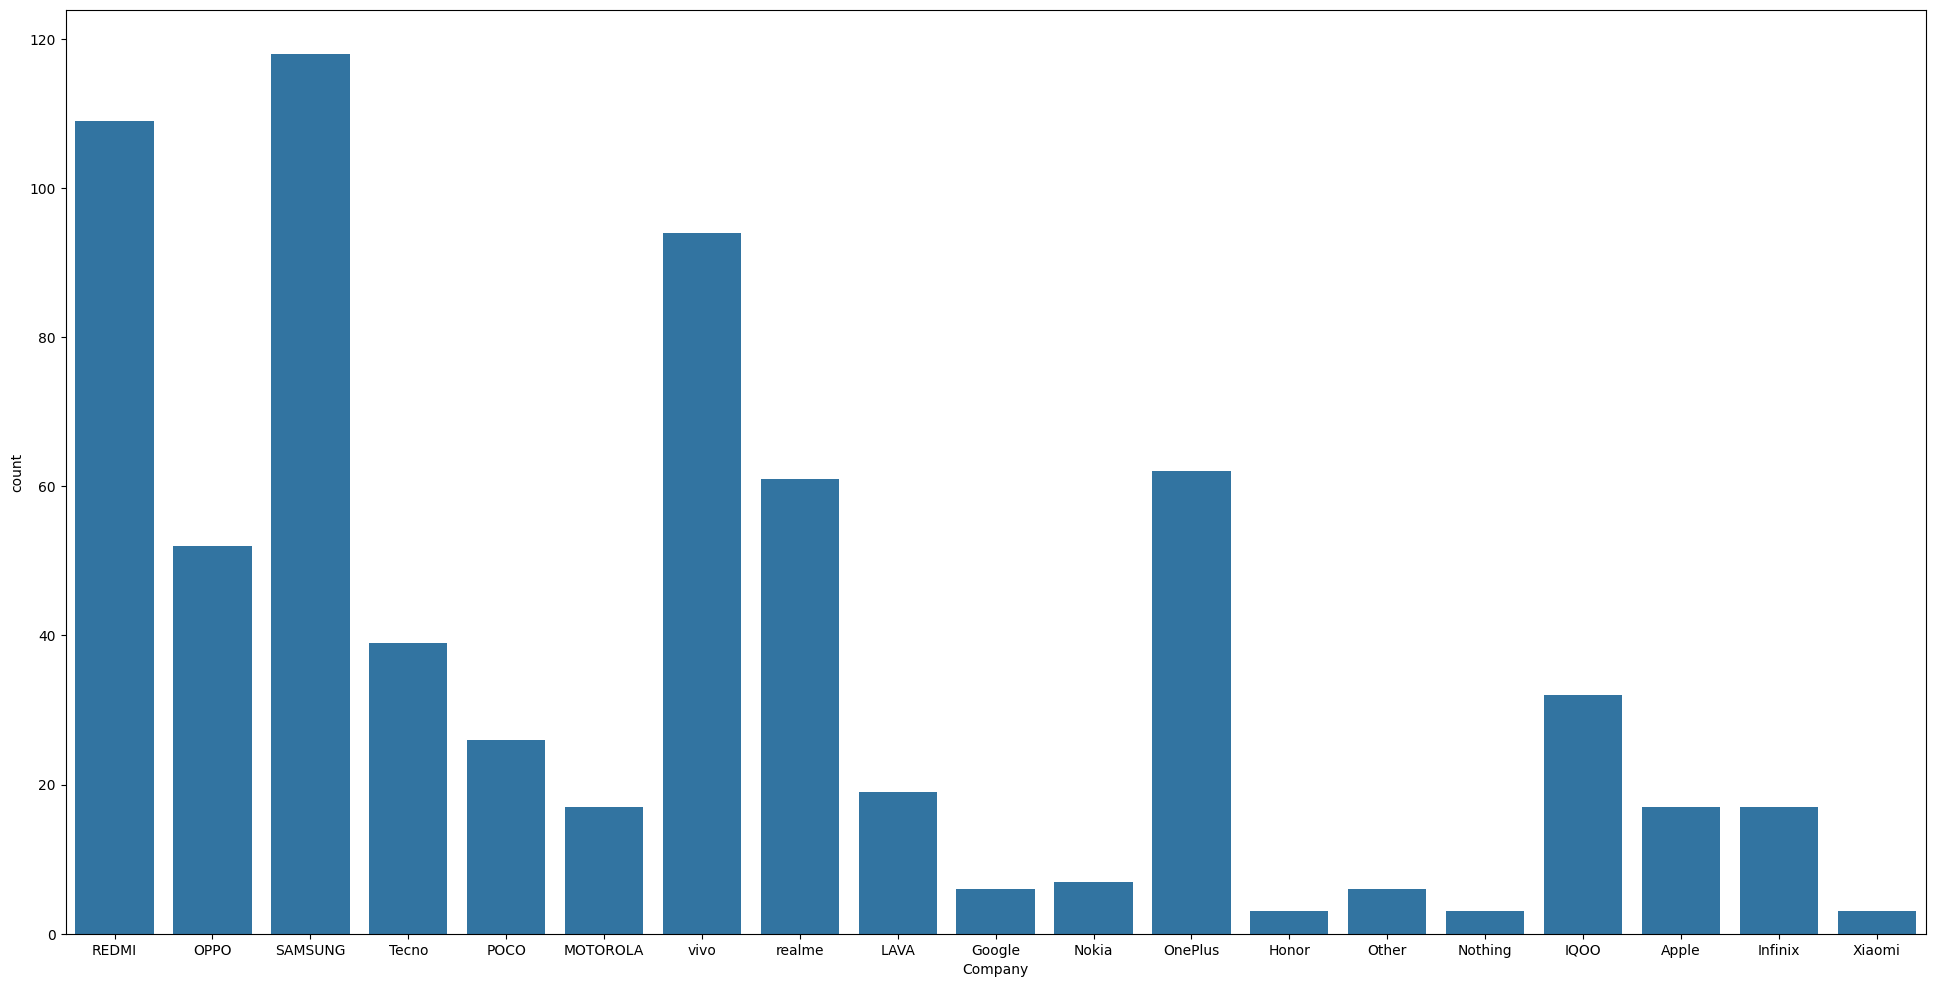

,count,proportion
Company,,
SAMSUNG,118,0.170767
REDMI,109,0.157742
vivo,94,0.136035
OnePlus,62,0.089725
realme,61,0.088278
OPPO,52,0.075253
Tecno,39,0.056440
IQOO,32,0.046310
POCO,26,0.037627


In [146]:
uni_cat(data=cat,x='Company')

In [148]:
cat = pd.get_dummies(cat,drop_first=True,dtype=int)

In [149]:
cat

,Company_Google,Company_Honor,Company_IQOO,Company_Infinix,Company_LAVA,Company_MOTOROLA,Company_Nokia,Company_Nothing,Company_OPPO,Company_OnePlus,...,displaytype_ Full HD Display,displaytype_ Full HD+ AMOLED Display,displaytype_ Full HD+ Display,displaytype_ Full HD+ E3 Super AMOLED Display,displaytype_ Full HD+ Super AMOLED Display,displaytype_ HD Display,displaytype_ HD+ Display,displaytype_ Quad HD Display,displaytype_ Quad HD+ Display,displaytype_ Super Retina XDR Display
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
980,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
981,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [151]:
df = pd.concat([num,cat],axis=1)
df

,price,Depth,Width,Height,Weight,Battery,RAM,ROM,displaysize,cam,...,displaytype_ Full HD Display,displaytype_ Full HD+ AMOLED Display,displaytype_ Full HD+ Display,displaytype_ Full HD+ E3 Super AMOLED Display,displaytype_ Full HD+ Super AMOLED Display,displaytype_ HD Display,displaytype_ HD+ Display,displaytype_ Quad HD Display,displaytype_ Quad HD+ Display,displaytype_ Super Retina XDR Display
0,18365,6.280000,70.600000,146.240000,172.500000,5000.0,6.0,128.0,16.94,108.0,...,0,0,1,0,0,0,0,0,0,0
1,22509,8.157179,74.895639,158.502469,190.343125,5000.0,12.0,256.0,16.94,108.0,...,0,0,0,0,0,0,0,0,0,0
2,20470,8.157179,74.895639,158.502469,172.500000,5000.0,8.0,256.0,16.94,108.0,...,0,0,1,0,0,0,0,0,0,0
3,20445,8.157179,74.895639,158.502469,173.500000,5000.0,8.0,256.0,16.94,108.0,...,0,0,0,0,0,0,0,0,0,0
4,22539,8.157179,74.895639,158.502469,190.343125,5000.0,12.0,256.0,16.94,108.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,30890,8.100000,74.800000,159.600000,189.000000,5000.0,8.0,128.0,16.51,86.0,...,0,0,1,0,0,0,0,0,0,0
980,11999,8.800000,76.400000,165.100000,195.000000,5000.0,4.0,128.0,16.76,59.0,...,0,0,1,0,0,0,0,0,0,0
981,14499,8.400000,76.900000,165.400000,195.000000,5000.0,6.0,128.0,16.76,50.0,...,0,0,1,0,0,0,0,0,0,0
982,23999,8.400000,76.900000,165.400000,195.000000,5000.0,8.0,128.0,16.76,50.0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
x = df.drop('price',axis=1)

In [154]:
y = np.log(df['price'])

In [160]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import *

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [163]:
def model_eval(model,x_train,x_test,y_train,y_test,model_name):
    model.fit(x_train,y_train)
    r2train = model.score(x_train,y_train)
    r2test = model.score(x_test,y_test)
    y_pred_train = np.exp(model.predict(x_train))
    y_pred_test = np.exp(model.predict(x_test))
    mae_train = mean_absolute_error(np.exp(y_train),y_pred_train)
    mae_test = mean_absolute_error(np.exp(y_test),y_pred_test)
    mse_train = mean_squared_error(np.exp(y_train),y_pred_train)
    mse_test = mean_squared_error(np.exp(y_test),y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    ff = pd.DataFrame({'R2_train':r2train,'R2_test':r2test,'MAE_train':mae_train,'MAE_test':mae_test,
                       'RMSE_train':rmse_train,'RMSE_test':rmse_test},index=[model_name])
    return ff

In [164]:
lr = LinearRegression()

In [165]:
lr_res = model_eval(lr,x_train,x_test,y_train,y_test,"LinReg")

In [166]:
lr_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
LinReg,0.897638,0.887234,3451.214354,4525.323921,5907.327347,7253.431174


In [167]:
dtc = DecisionTreeRegressor()
dtc_res = model_eval(dtc,x_train,x_test,y_train,y_test,"DecReg")
dtc_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
DecReg,0.99283,0.821274,479.307657,5438.347295,1868.990137,10391.466164


In [168]:
params = {'max_depth':[2,5,8,10,12,15],
          'min_samples_split':[5,10,15,20,25],
          'min_samples_leaf':[2,5,8,10,12,15]}

In [169]:
gd_search = GridSearchCV(estimator=dtc,n_jobs=-1,cv=10,param_grid=params)

In [170]:
gd_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10, 12, 15],
                         'min_samples_leaf': [2, 5, 8, 10, 12, 15],
                         'min_samples_split': [5, 10, 15, 20, 25]})

In [173]:
gd_search.best_params_

{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [171]:
dtc2 = DecisionTreeRegressor(**gd_search.best_params_)

In [172]:
dtc_res2 = model_eval(dtc2,x_train,x_test,y_train,y_test,"DecReg2")
dtc_res2

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
DecReg2,0.950005,0.826517,2945.220629,6463.1801,6222.931747,11710.435164


In [174]:
Bagreg = BaggingRegressor(estimator=lr,n_estimators=75)
bag_res = model_eval(Bagreg,x_train,x_test,y_train,y_test,"BagReg")
bag_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
BagReg,0.893493,0.883436,3764.665963,5032.432389,6532.186911,8437.460826


In [175]:
Bagreg2 = BaggingRegressor(estimator=dtc,n_estimators=75)
bag_res2 = model_eval(Bagreg2,x_train,x_test,y_train,y_test,"BagReg2")
bag_res2

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
BagReg2,0.972308,0.918393,2032.001658,4978.598178,4394.251732,10383.403222


In [176]:
Bagreg3 = BaggingRegressor(estimator=dtc2,n_estimators=75)
bag_res3 = model_eval(Bagreg3,x_train,x_test,y_train,y_test,"BagReg3")
bag_res3

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
BagReg3,0.933762,0.891519,3573.527699,6053.504747,8772.693335,13022.354864


In [177]:
rf = RandomForestRegressor()
rf_res = model_eval(rf,x_train,x_test,y_train,y_test,"RandForest")
rf_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
RandForest,0.97306,0.913699,2076.045007,5127.016318,5152.544975,10846.900092


In [178]:
params = {'max_depth':[2,5,8,10,12,15],
          'min_samples_split':[2,5,8,10,15,20,25],
          'min_samples_leaf':[2,5,8,10,12,15],
          'bootstrap':[True],
          'max_features':['log2','sqrt'],
          'max_samples':[0.7,0.75],
          'n_estimators':[25,50,75,100]}

In [179]:
rf_search = RandomizedSearchCV(rf,param_distributions=params,n_jobs=-1,cv=15)

In [180]:
rf_search.fit(x_train,y_train)

RandomizedSearchCV(cv=15, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [2, 5, 8, 10, 12, 15],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_samples': [0.7, 0.75],
                                        'min_samples_leaf': [2, 5, 8, 10, 12,
                                                             15],
                                        'min_samples_split': [2, 5, 8, 10, 15,
                                                              20, 25],
                                        'n_estimators': [25, 50, 75, 100]})

In [181]:
rf_search.best_params_

{'n_estimators': 75,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': True}

In [182]:
rf2 = RandomForestRegressor(**rf_search.best_params_)

In [183]:
rf2_res = model_eval(rf2,x_train,x_test,y_train,y_test,"RandForest2")
rf2_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
RandForest2,0.79013,0.742326,6362.166475,9153.155261,14182.442795,18467.040356


In [184]:
abr = AdaBoostRegressor(estimator=lr,learning_rate=1.0,n_estimators=50)

In [185]:
adr_res = model_eval(abr,x_train,x_test,y_train,y_test,"AdaBoostR")
adr_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
AdaBoostR,0.864027,0.822567,4080.338394,6554.087877,6057.377518,10826.675481


In [186]:
abr2 = AdaBoostRegressor(estimator=dtc,learning_rate=1.0,n_estimators=50)
adr_res2 = model_eval(abr2,x_train,x_test,y_train,y_test,"AdaBoostR2")
adr_res2

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
AdaBoostR2,0.982621,0.931788,1073.115859,4164.451116,2624.689341,8583.182061


In [187]:
abr3 = AdaBoostRegressor(estimator=dtc2,learning_rate=1.0,n_estimators=50)
adr_res3 = model_eval(abr3,x_train,x_test,y_train,y_test,"AdaBoostR3")
adr_res3

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
AdaBoostR3,0.958573,0.91529,2480.366802,4964.363865,4314.781913,9413.310054


In [188]:
abr4 = AdaBoostRegressor(estimator=Bagreg,learning_rate=1.0,n_estimators=50)
adr_res4 = model_eval(abr4,x_train,x_test,y_train,y_test,"AdaBoostR4")
adr_res4

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
AdaBoostR4,0.847375,0.811743,4645.495774,6914.306721,6755.761411,11661.563755


In [189]:
abr5 = AdaBoostRegressor(estimator=rf,learning_rate=1.0,n_estimators=50)
adr_res5 = model_eval(abr5,x_train,x_test,y_train,y_test,"AdaBoostR5")
adr_res5

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
AdaBoostR5,0.951192,0.901368,2861.398092,5446.7149,4728.674045,10843.137273


In [190]:
abr6 = AdaBoostRegressor(estimator=abr,learning_rate=1.0,n_estimators=50)
adr_res6 = model_eval(abr6,x_train,x_test,y_train,y_test,"AdaBoostR6")
adr_res6

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
AdaBoostR6,0.879342,0.836397,3711.733508,6190.293262,5428.816184,12606.396236


In [191]:
resultdf2 = pd.concat([lr_res,dtc_res,dtc_res2,bag_res,bag_res2,bag_res3,rf_res,rf2_res,adr_res,adr_res2,adr_res3,adr_res4,adr_res5,adr_res6])

In [192]:
resultdf2

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
LinReg,0.897638,0.887234,3451.214354,4525.323921,5907.327347,7253.431174
DecReg,0.992830,0.821274,479.307657,5438.347295,1868.990137,10391.466164
DecReg2,0.950005,0.826517,2945.220629,6463.180100,6222.931747,11710.435164
BagReg,0.893493,0.883436,3764.665963,5032.432389,6532.186911,8437.460826
BagReg2,0.972308,0.918393,2032.001658,4978.598178,4394.251732,10383.403222
BagReg3,0.933762,0.891519,3573.527699,6053.504747,8772.693335,13022.354864
RandForest,0.973060,0.913699,2076.045007,5127.016318,5152.544975,10846.900092
RandForest2,0.790130,0.742326,6362.166475,9153.155261,14182.442795,18467.040356
AdaBoostR,0.864027,0.822567,4080.338394,6554.087877,6057.377518,10826.675481
AdaBoostR2,0.982621,0.931788,1073.115859,4164.451116,2624.689341,8583.182061


In [193]:
from xgboost import XGBRegressor

In [265]:
xgb = XGBRegressor(n_estimators=500,learning_rate=0.8,reg_lambda=1,alpha=0.25,objective='reg:squarederror',
                   max_depth=2,max_leaves=8)

In [266]:
xgb_res = model_eval(xgb,x_train,x_test,y_train,y_test,"XGB")
xgb_res

,R2_train,R2_test,MAE_train,MAE_test,RMSE_train,RMSE_test
XGB,0.974668,0.929516,1725.671321,4104.666633,2965.071612,7695.215975
